In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option("display.max_columns", None)
item_df = pd.read_csv("/content/drive/MyDrive/csv files/datastorm_5.0_finals/item_info.csv")
item_df

,item code,department,item_category,item_name
0,item_cd_1,fresh,vegetables,carrot
1,item_cd_2,fresh,vegetables,potatoes
2,item_cd_3,fresh,vegetables,pumpkin
3,item_cd_4,fresh,vegetables,cucumber
4,item_cd_5,fresh,vegetables,green_beans
...,...,...,...,...
65,item_cd_66,animal products,seafood,prawns
66,item_cd_67,animal products,seafood,cuttlefish
67,item_cd_68,animal products,seafood,tuna
68,item_cd_69,animal products,seafood,seer_fish


In [ ]:
item_df['item_name'].unique()

array(['carrot', 'potatoes', 'pumpkin', 'cucumber', 'green_beans',
       'beetroot', 'capsicum', 'tomatoes', 'banana', 'papaya',
       'fuji apple', 'green apple', 'pineapple', 'orange', 'grapes',
       'mango', 'cat food', 'dog treats', 'chicken and liver treats',
       'dog leash', 'slicker brush', 'pet shampoo', 'dog collar',
       'cat litter', 'shampoo', 'conditioner', 'body_wash',
       'facial_cleanser', 'soap', 'perfume', 'lip_balm', 'sunscreen',
       'milk carton', 'vanialla ice cream', 'chocolate ice cream',
       'butter', 'cheese slices', 'cheese wedges', 'set yogurt',
       'drinking yogurt', 'protein_bars', 'multivitamin_bottle',
       'smoothie_mix_6_packs', 'green_tea_bags_25_pack', 'yoga_mat',
       'baby_soap', 'baby_diapers', 'baby_cream', 'baby_shampoo',
       'silicon pacifiers', 'single_rule_exercise_book_120p',
       'a5_sprial_notebook_100p', 'single_rule_cr_book_120p',
       'glue_stick', 'highlighter_6_pack', 'whiteboard_marker_blue',
       'st

In [ ]:
item_df.describe()

,item code,department,item_category,item_name
count,70,70,70,70
unique,70,7,12,70
top,item_cd_1,animal products,stationery,carrot
freq,1,18,10,1


In [ ]:
item_df.dtypes

item code        object
department       object
item_category    object
item_name        object
dtype: object

In [ ]:
item_df['item_category'].unique()

array(['vegetables', 'fruits', 'pet_food', 'pet_care',
       'beauty_and_personal_care', 'dairy', 'wellness_food',
       'wellness_products', 'baby_needs', 'stationery', 'frozen_meat',
       'seafood'], dtype=object)

In [ ]:
item_df['department'].unique()

array(['fresh', 'pet_products', 'Hygiene', 'animal products', 'lifestyle',
       'household', 'homeware'], dtype=object)

In [ ]:
item_df[item_df['department'] == 'fresh']

,item code,department,item_category,item_name
0,item_cd_1,fresh,vegetables,carrot
1,item_cd_2,fresh,vegetables,potatoes
2,item_cd_3,fresh,vegetables,pumpkin
3,item_cd_4,fresh,vegetables,cucumber
4,item_cd_5,fresh,vegetables,green_beans
5,item_cd_6,fresh,vegetables,beetroot
6,item_cd_7,fresh,vegetables,capsicum
7,item_cd_8,fresh,fruits,tomatoes
8,item_cd_9,fresh,fruits,banana
9,item_cd_10,fresh,fruits,papaya


In [ ]:
item_df[item_df['item_category'] == 'baby_needs']

,item code,department,item_category,item_name
45,item_cd_46,Hygiene,baby_needs,baby_soap
46,item_cd_47,Hygiene,baby_needs,baby_diapers
47,item_cd_48,Hygiene,baby_needs,baby_cream
48,item_cd_49,Hygiene,baby_needs,baby_shampoo
49,item_cd_50,household,baby_needs,silicon pacifiers


In [ ]:
trx_df = pd.read_csv("/content/drive/MyDrive/csv files/datastorm_5.0_finals/trx_table.csv")
trx_df

,customer_code,transaction_time,item code,sales_quantity
0,customer_code_78,1/3/2023 13:49,item_cd_12,13
1,customer_code_78,1/12/2023 8:08,item_cd_6,14
2,customer_code_78,1/17/2023 12:15,item_cd_2,14
3,customer_code_78,1/25/2023 16:37,item_cd_16,11
4,customer_code_78,2/3/2023 15:11,item_cd_3,14
...,...,...,...,...
654880,customer_code_548,5/30/2023 12:42,item_cd_44,1
654881,customer_code_3672,5/30/2023 12:42,item_cd_44,1
654882,customer_code_2028,5/30/2023 12:42,item_cd_44,1
654883,customer_code_1163,5/30/2023 12:42,item_cd_44,1


In [ ]:
trx_df.describe()

,sales_quantity
count,654885.000000
mean,7.307384
std,7.923225
min,1.000000
25%,3.000000
50%,5.000000
75%,9.000000
max,93.000000


In [ ]:
trx_df.dtypes

customer_code       object
transaction_time    object
item code           object
sales_quantity       int64
dtype: object

---
# 1.Data Preprocessing

In [ ]:
# Strip 'customer_code_' from customer_code column if present
trx_df['customer_code'] = trx_df['customer_code'].str.replace('customer_code_', '').astype(int)

In [ ]:
trx_df.duplicated().sum()

4

In [ ]:
trx_df[trx_df.duplicated(keep=False)]

,customer_code,transaction_time,item code,sales_quantity
12706,4042,4/26/2023 11:51,item_cd_2,3
129444,3250,2/13/2023 17:12,item_cd_69,6
174889,1403,3/13/2023 14:56,item_cd_13,3
221757,4151,2/13/2023 14:41,item_cd_64,3
274471,4042,4/26/2023 11:51,item_cd_2,3
382789,1403,3/13/2023 14:56,item_cd_13,3
425877,4151,2/13/2023 14:41,item_cd_64,3
431439,3250,2/13/2023 17:12,item_cd_69,6


In [ ]:
trx_df = trx_df.drop_duplicates()

In [ ]:
trx_df.duplicated().sum()

0

In [ ]:
trx_df.isnull().sum()

customer_code       0
transaction_time    0
item code           0
sales_quantity      0
dtype: int64

In [ ]:
item_df.isnull().sum()

item code        0
department       0
item_category    0
item_name        0
dtype: int64

In [ ]:
# Merge the DataFrames on 'item code'
merged_df = pd.merge(trx_df, item_df, on='item code', how='inner')

In [ ]:
merged_df['customer_code'].nunique()

4200

In [ ]:
merged_df.dtypes

customer_code        int64
transaction_time    object
item code           object
sales_quantity       int64
department          object
item_category       object
item_name           object
dtype: object

In [ ]:
merged_df['transaction_time'] = pd.to_datetime(merged_df['transaction_time'])
merged_df

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name
0,78,2023-01-03 13:49:00,item_cd_12,13,fresh,fruits,green apple
1,792,2023-04-19 17:04:00,item_cd_12,11,fresh,fruits,green apple
2,792,2023-05-29 08:26:00,item_cd_12,27,fresh,fruits,green apple
3,792,2023-06-12 11:57:00,item_cd_12,25,fresh,fruits,green apple
4,4024,2023-02-22 08:55:00,item_cd_12,13,fresh,fruits,green apple
...,...,...,...,...,...,...,...
654876,3057,2023-03-29 10:58:00,item_cd_46,6,Hygiene,baby_needs,baby_soap
654877,3057,2023-04-22 08:56:00,item_cd_46,6,Hygiene,baby_needs,baby_soap
654878,3057,2023-04-29 10:48:00,item_cd_46,5,Hygiene,baby_needs,baby_soap
654879,3057,2023-06-24 16:07:00,item_cd_46,12,Hygiene,baby_needs,baby_soap


<ipython-input-26-8876f66fcca5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(merged_df, x='sales_quantity', y='department', inner='box', palette='Dark2')


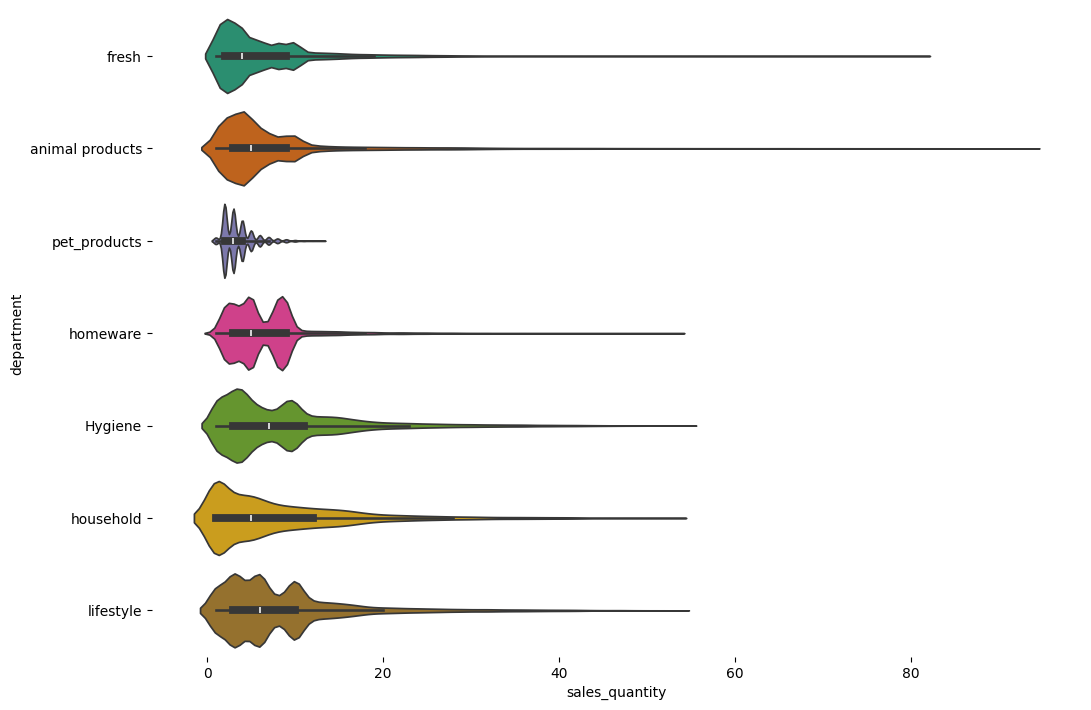

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(merged_df['department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(merged_df, x='sales_quantity', y='department', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

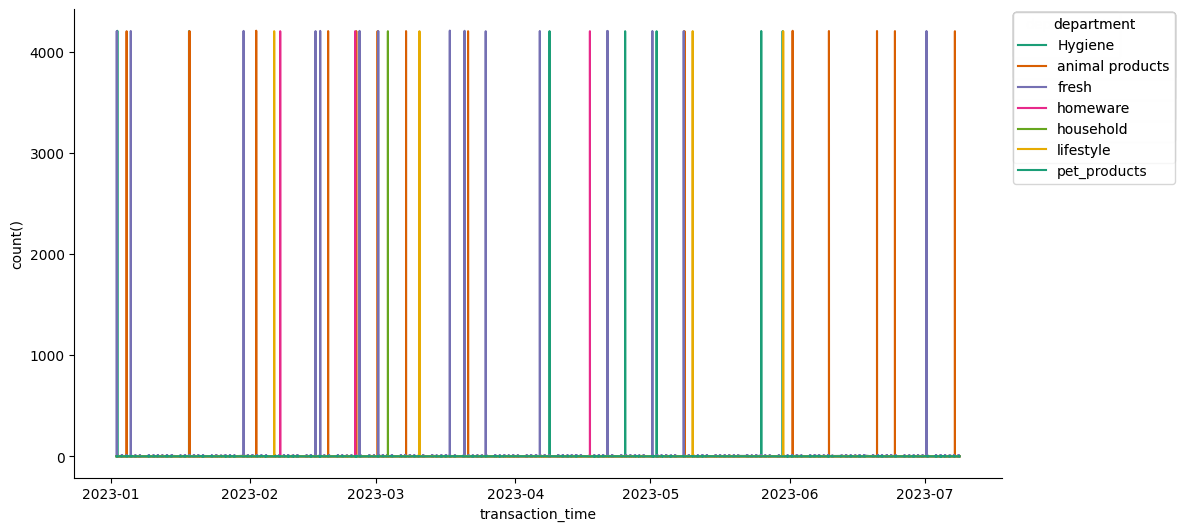

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['transaction_time']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'transaction_time'}, axis=1)
              .sort_values('transaction_time', ascending=True))
  xs = counted['transaction_time']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('transaction_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('department')):
  _plot_series(series, series_name, i)
  fig.legend(title='department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_time')
_ = plt.ylabel('count()')

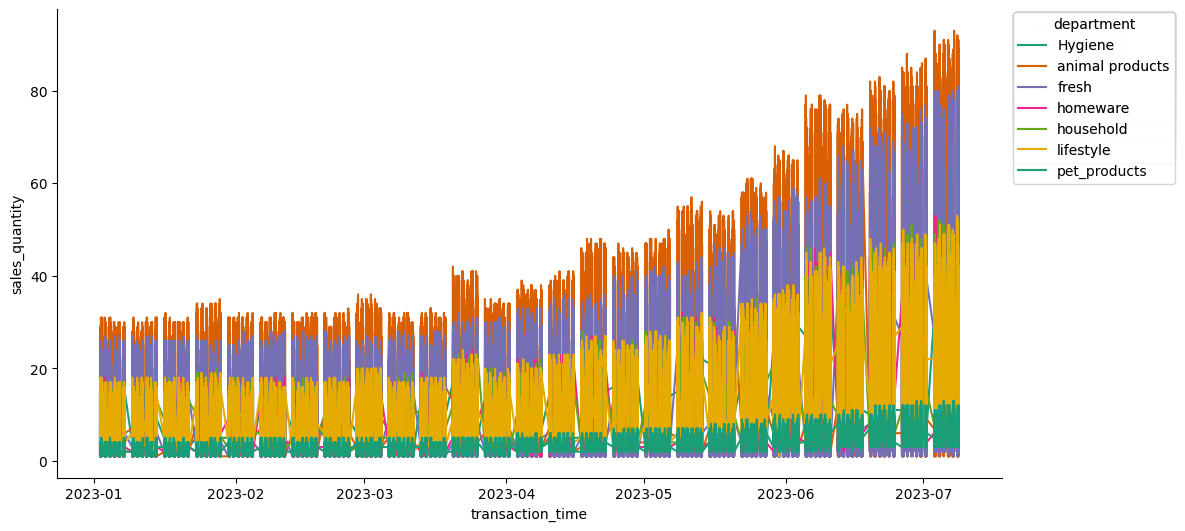

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['transaction_time']
  ys = series['sales_quantity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('transaction_time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('department')):
  _plot_series(series, series_name, i)
  fig.legend(title='department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('transaction_time')
_ = plt.ylabel('sales_quantity')

In [ ]:
merged_df['transaction_time'].min()

Timestamp('2023-01-02 08:00:00')

In [ ]:
merged_df['transaction_time'].max()

Timestamp('2023-07-08 17:29:00')

### - filtering six months of transaction data



In [ ]:
start_date = '2023-01-08'
end_date = '2023-07-08'

merged_df = merged_df[(merged_df['transaction_time'] >= start_date) & (merged_df['transaction_time'] <= end_date)]

print(merged_df.head())
print(merged_df['transaction_time'].min(), merged_df['transaction_time'].max())
print(merged_df.shape)

   customer_code    transaction_time   item code  sales_quantity department  \
1            792 2023-04-19 17:04:00  item_cd_12              11      fresh   
2            792 2023-05-29 08:26:00  item_cd_12              27      fresh   
3            792 2023-06-12 11:57:00  item_cd_12              25      fresh   
4           4024 2023-02-22 08:55:00  item_cd_12              13      fresh   
5            176 2023-03-17 15:51:00  item_cd_12              14      fresh   

  item_category    item_name  
1        fruits  green apple  
2        fruits  green apple  
3        fruits  green apple  
4        fruits  green apple  
5        fruits  green apple  
2023-01-09 08:00:00 2023-07-07 17:29:00
(617944, 7)


In [ ]:
merged_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name
1,792,2023-04-19 17:04:00,item_cd_12,11,fresh,fruits,green apple
2,792,2023-05-29 08:26:00,item_cd_12,27,fresh,fruits,green apple
3,792,2023-06-12 11:57:00,item_cd_12,25,fresh,fruits,green apple
4,4024,2023-02-22 08:55:00,item_cd_12,13,fresh,fruits,green apple
5,176,2023-03-17 15:51:00,item_cd_12,14,fresh,fruits,green apple


---
# 2.Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics for numerical columns
print(merged_df.describe(),'\n')

# Unique values and counts for categorical columns
print(merged_df['item_category'].value_counts(),'\n')
print(merged_df['department'].value_counts())

       customer_code               transaction_time  sales_quantity
count  617944.000000                         617944   617944.000000
mean     2102.389458  2023-04-07 17:42:30.534902272        7.333231
min         1.000000            2023-01-09 08:00:00        1.000000
25%      1052.000000            2023-02-24 08:55:00        3.000000
50%      2104.000000            2023-04-06 11:12:00        5.000000
75%      3152.000000            2023-05-22 11:56:00        9.000000
max      4200.000000            2023-07-07 17:29:00       93.000000
std      1212.310941                            NaN        8.013079 

item_category
fruits                      136012
vegetables                  112704
frozen_meat                  88803
seafood                      59452
beauty_and_personal_care     55699
wellness_food                37680
baby_needs                   34443
dairy                        31990
stationery                   29949
pet_care                     16490
pet_food              

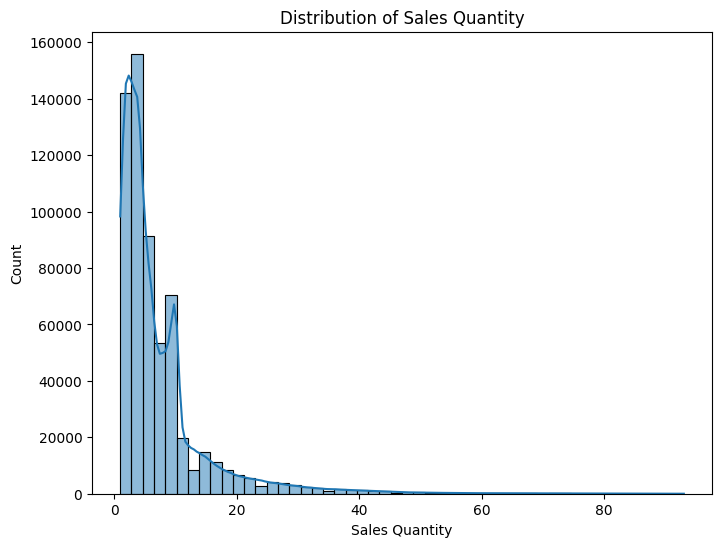

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['sales_quantity'], bins=50, kde=True)
plt.title('Distribution of Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Count')
plt.show()

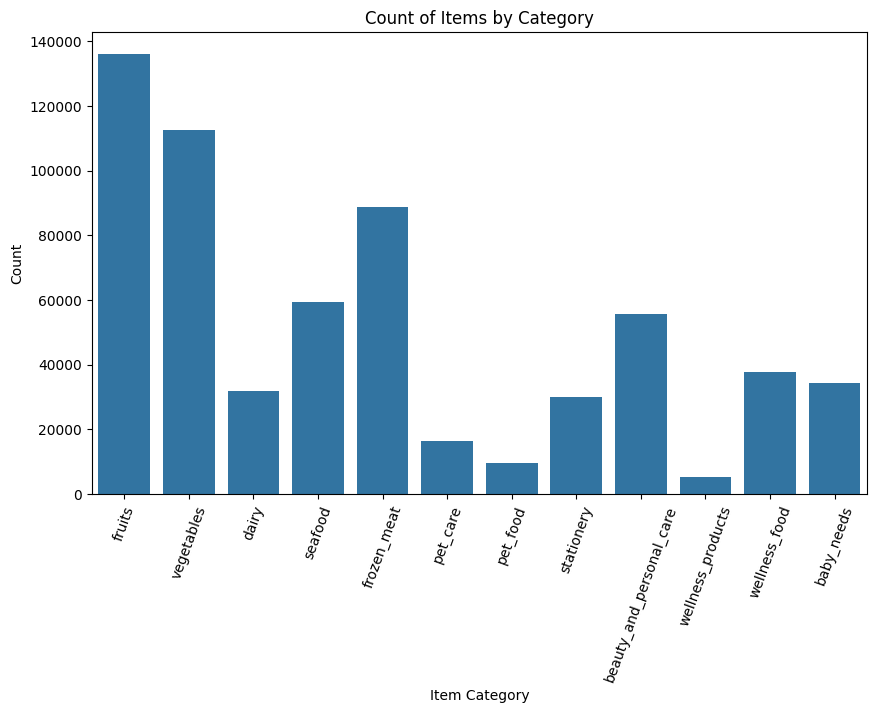

In [ ]:
# Bar plot of item categories
plt.figure(figsize=(10, 6))
sns.countplot(x='item_category', data=merged_df)
plt.title('Count of Items by Category')
plt.xticks(rotation=70)
plt.xlabel('Item Category')
plt.ylabel('Count')
plt.show()

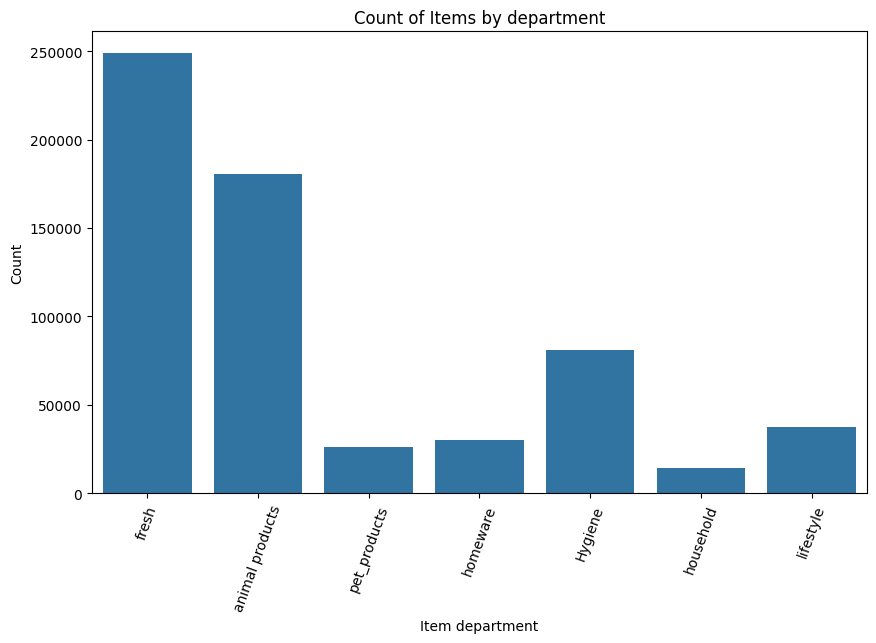

In [ ]:
# Bar plot of departments
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=merged_df)
plt.title('Count of Items by department')
plt.xticks(rotation=70)
plt.xlabel('Item department')
plt.ylabel('Count')
plt.show()

In [ ]:
# Group by 'department' and perform various operations
grouped = merged_df.groupby('department')

# Example 1: Count the number of items in each department
item_counts = grouped['item_category'].count()

# Example 2: Get the list of items in each department
items_by_department = grouped['item_category'].apply(lambda x: list(x.unique()))

# Example 3: Get summary statistics for each department (e.g., earliest and latest transaction times)
transaction_summary = grouped['transaction_time'].agg(['min', 'max'])

print("Item counts by department:")
print(item_counts)
print("\nItems by department:")
print(items_by_department)
print("\nTransaction time summary by department:")
print(transaction_summary)

Item counts by department:
department
Hygiene             80768
animal products    180245
fresh              248716
homeware            29949
household           14529
lifestyle           37680
pet_products        26057
Name: item_category, dtype: int64

Items by department:
department
Hygiene            [beauty_and_personal_care, baby_needs]
animal products             [dairy, seafood, frozen_meat]
fresh                                [fruits, vegetables]
homeware                                     [stationery]
household                 [wellness_products, baby_needs]
lifestyle                                 [wellness_food]
pet_products                         [pet_care, pet_food]
Name: item_category, dtype: object

Transaction time summary by department:
                                min                 max
department                                             
Hygiene         2023-01-09 08:04:00 2023-07-07 17:28:00
animal products 2023-01-09 08:00:00 2023-07-07 17:28:00
fresh  

<ipython-input-38-2e40d845e3cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['transaction_month'] = merged_df['transaction_time'].dt.to_period('M')


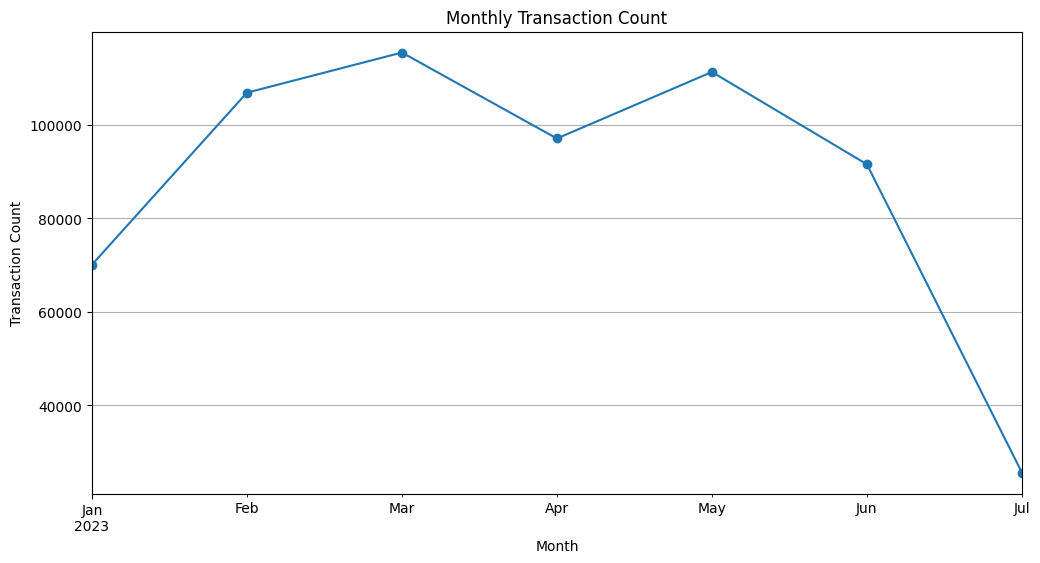

In [ ]:
# Extract month and year for time series analysis
merged_df['transaction_month'] = merged_df['transaction_time'].dt.to_period('M')

# Plot monthly transaction count
plt.figure(figsize=(12, 6))
merged_df.groupby('transaction_month').size().plot(kind='line', marker='o')
plt.title('Monthly Transaction Count')
plt.xlabel('Month')
plt.ylabel('Transaction Count')
plt.grid(True)
plt.show()

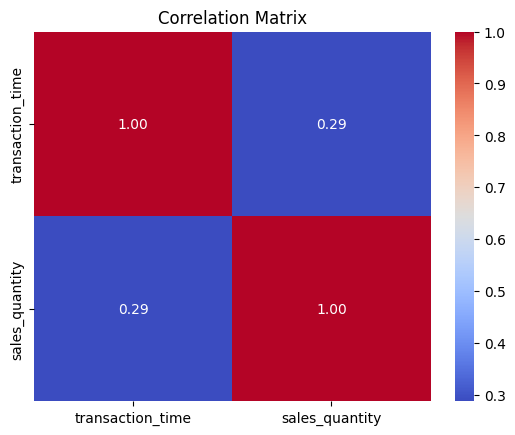

In [ ]:
# Correlation matrix
correlation_matrix = merged_df[['transaction_time','sales_quantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

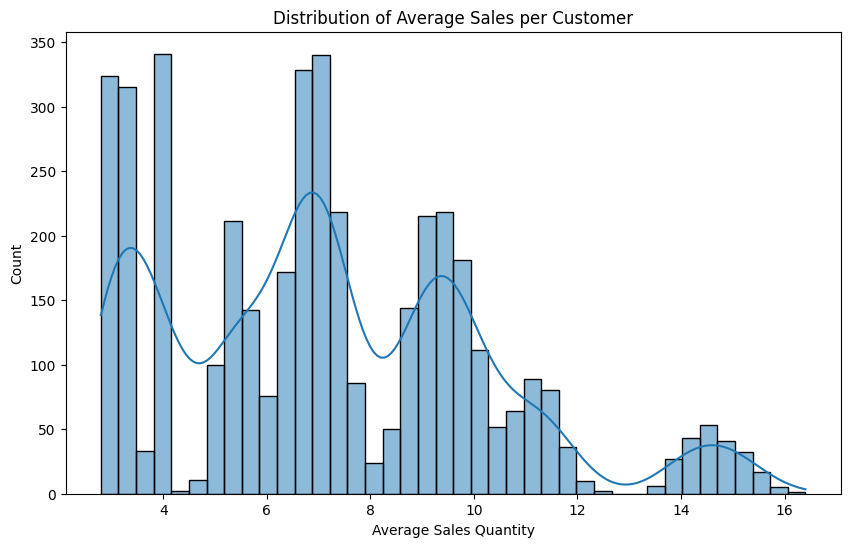

In [ ]:
# Example: Average sales quantity per customer
avg_sales_per_customer = merged_df.groupby('customer_code')['sales_quantity'].mean()

# Plot distribution of average sales per customer
plt.figure(figsize=(10, 6))
sns.histplot(avg_sales_per_customer, bins=40, kde=True)
plt.title('Distribution of Average Sales per Customer')
plt.xlabel('Average Sales Quantity')
plt.ylabel('Count')
plt.show()


In [ ]:
merged_df.head()

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,transaction_month
1,792,2023-04-19 17:04:00,item_cd_12,11,fresh,fruits,green apple,2023-04
2,792,2023-05-29 08:26:00,item_cd_12,27,fresh,fruits,green apple,2023-05
3,792,2023-06-12 11:57:00,item_cd_12,25,fresh,fruits,green apple,2023-06
4,4024,2023-02-22 08:55:00,item_cd_12,13,fresh,fruits,green apple,2023-02
5,176,2023-03-17 15:51:00,item_cd_12,14,fresh,fruits,green apple,2023-03


In [ ]:
merged_df[merged_df['customer_code'] == 6].sort_values(by='transaction_time').head(50)

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,transaction_month
313566,6,2023-01-09 10:43:00,item_cd_61,6,animal products,frozen_meat,chicken_breast_slices_500g,2023-01
379592,6,2023-01-09 11:56:00,item_cd_68,4,animal products,seafood,tuna,2023-01
362935,6,2023-01-10 10:47:00,item_cd_62,2,animal products,frozen_meat,chicken_sausages_150g,2023-01
422806,6,2023-01-14 10:58:00,item_cd_65,7,animal products,frozen_meat,beef_meatballs_200g,2023-01
347329,6,2023-01-17 14:18:00,item_cd_66,3,animal products,seafood,prawns,2023-01
560123,6,2023-01-18 10:37:00,item_cd_32,1,Hygiene,beauty_and_personal_care,sunscreen,2023-01
429443,6,2023-01-18 12:44:00,item_cd_63,2,animal products,frozen_meat,pork_bacon_500g,2023-01
320892,6,2023-01-18 13:04:00,item_cd_61,1,animal products,frozen_meat,chicken_breast_slices_500g,2023-01
337684,6,2023-01-18 13:17:00,item_cd_61,1,animal products,frozen_meat,chicken_breast_slices_500g,2023-01
414676,6,2023-01-18 16:34:00,item_cd_67,1,animal products,seafood,cuttlefish,2023-01


---
# Customer Segmentation

In [ ]:
# Aggregate data to get total quantities per item category for each customer
agg_data = merged_df.groupby(['customer_code', 'item_category']).agg({
    'sales_quantity': 'sum'
}).reset_index()


In [ ]:
# Pivot the table to get item categories as separate columns
pivot_data = agg_data.pivot(index='customer_code', columns='item_category', values='sales_quantity').fillna(0).reset_index()

In [ ]:
# Additional metrics for each customer
customer_metrics = merged_df.groupby('customer_code').agg({
    'transaction_time': 'count',  # Total number of transactions
}).reset_index()

# Rename columns for clarity
customer_metrics.columns = ['customer_code', 'total_transactions']


In [ ]:
# Merge pivoted data with customer metrics
customer_data = pd.merge(pivot_data, customer_metrics, on='customer_code')

In [ ]:
merged_df[(merged_df['customer_code'] == 'customer_code_1') & (merged_df['item_category'] == 'dairy')]

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,transaction_month


In [ ]:
# Calculate purchase frequency (number of days between first and last purchase divided by number of transactions)
first_last_purchase = merged_df.groupby('customer_code').agg({
    'transaction_time': ['min', 'max']
}).reset_index()

first_last_purchase.columns = ['customer_code', 'first_purchase', 'last_purchase']
first_last_purchase['purchase_period'] = (first_last_purchase['last_purchase'] - first_last_purchase['first_purchase']).dt.days

customer_data = customer_data.merge(first_last_purchase, on='customer_code')
customer_data['purchase_frequency'] = customer_data['purchase_period'] / customer_data['total_transactions']

# Drop unnecessary columns
customer_data = customer_data.drop(columns=['first_purchase', 'last_purchase', 'purchase_period'])

In [ ]:
customer_data

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency
0,1,3.0,24.0,0.0,52.0,496.0,0.0,0.0,12.0,22.0,402.0,20.0,0.0,142,1.239437
1,2,3.0,24.0,0.0,52.0,545.0,0.0,0.0,12.0,22.0,449.0,20.0,0.0,144,1.243056
2,3,3.0,24.0,791.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.220690
3,4,3.0,24.0,779.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.234483
4,5,3.0,24.0,1274.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,170,1.052941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,4196,3.0,1154.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.227586
4196,4197,3.0,1068.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,143,1.244755
4197,4198,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,945.0,190.0,145,1.220690
4198,4199,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,925.0,255.0,144,1.243056


In [ ]:
customer_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,2100.500000,72.610000,116.215476,62.461667,152.902143,226.159762,13.877619,8.035000,110.455714,47.845000,179.345476,75.615476,13.411429,147.129524,1.217109
std,1212.579894,276.119019,313.497113,233.199856,274.800319,284.089466,55.176305,32.156455,264.309364,147.675866,221.721306,221.064492,54.707094,10.481496,0.084393
min,1.000000,3.000000,24.000000,0.000000,52.000000,38.000000,0.000000,0.000000,12.000000,22.000000,33.000000,20.000000,0.000000,116.000000,1.023392
25%,1050.750000,3.000000,24.000000,0.000000,52.000000,38.000000,0.000000,0.000000,12.000000,22.000000,33.000000,20.000000,0.000000,144.000000,1.222222
50%,2100.500000,3.000000,24.000000,0.000000,52.000000,38.000000,0.000000,0.000000,12.000000,22.000000,33.000000,20.000000,0.000000,145.000000,1.234483
75%,3150.250000,3.000000,24.000000,0.000000,52.000000,439.250000,0.000000,0.000000,12.000000,22.000000,337.000000,20.000000,0.000000,145.000000,1.243056
max,4200.000000,1337.000000,1396.000000,1407.000000,1692.000000,1331.000000,304.000000,188.000000,1579.000000,1317.000000,1032.000000,1145.000000,409.000000,171.000000,1.543103


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

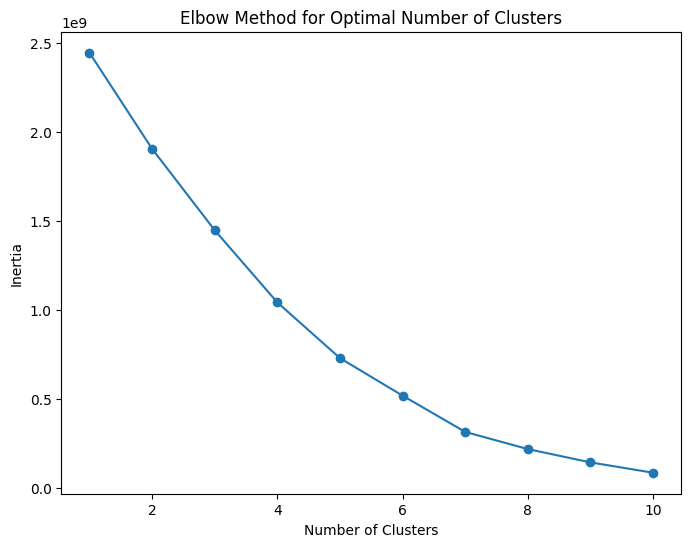

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customer_data.iloc[:, 1:])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
optimal_clusters = 7
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data.iloc[:, 1:])

customer_data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
0,1,3.0,24.0,0.0,52.0,496.0,0.0,0.0,12.0,22.0,402.0,20.0,0.0,142,1.239437,3
1,2,3.0,24.0,0.0,52.0,545.0,0.0,0.0,12.0,22.0,449.0,20.0,0.0,144,1.243056,3
2,3,3.0,24.0,791.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.220690,4
3,4,3.0,24.0,779.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.234483,4
4,5,3.0,24.0,1274.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,170,1.052941,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,4196,3.0,1154.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.227586,5
4196,4197,3.0,1068.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,143,1.244755,5
4197,4198,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,945.0,190.0,145,1.220690,1
4198,4199,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,925.0,255.0,144,1.243056,1


In [ ]:
# Analyze the characteristics of each cluster
cluster_counts = customer_data['cluster'].value_counts()
print(cluster_counts)

cluster
2    1572
3    1263
5     336
4     295
1     252
6     252
0     230
Name: count, dtype: int64


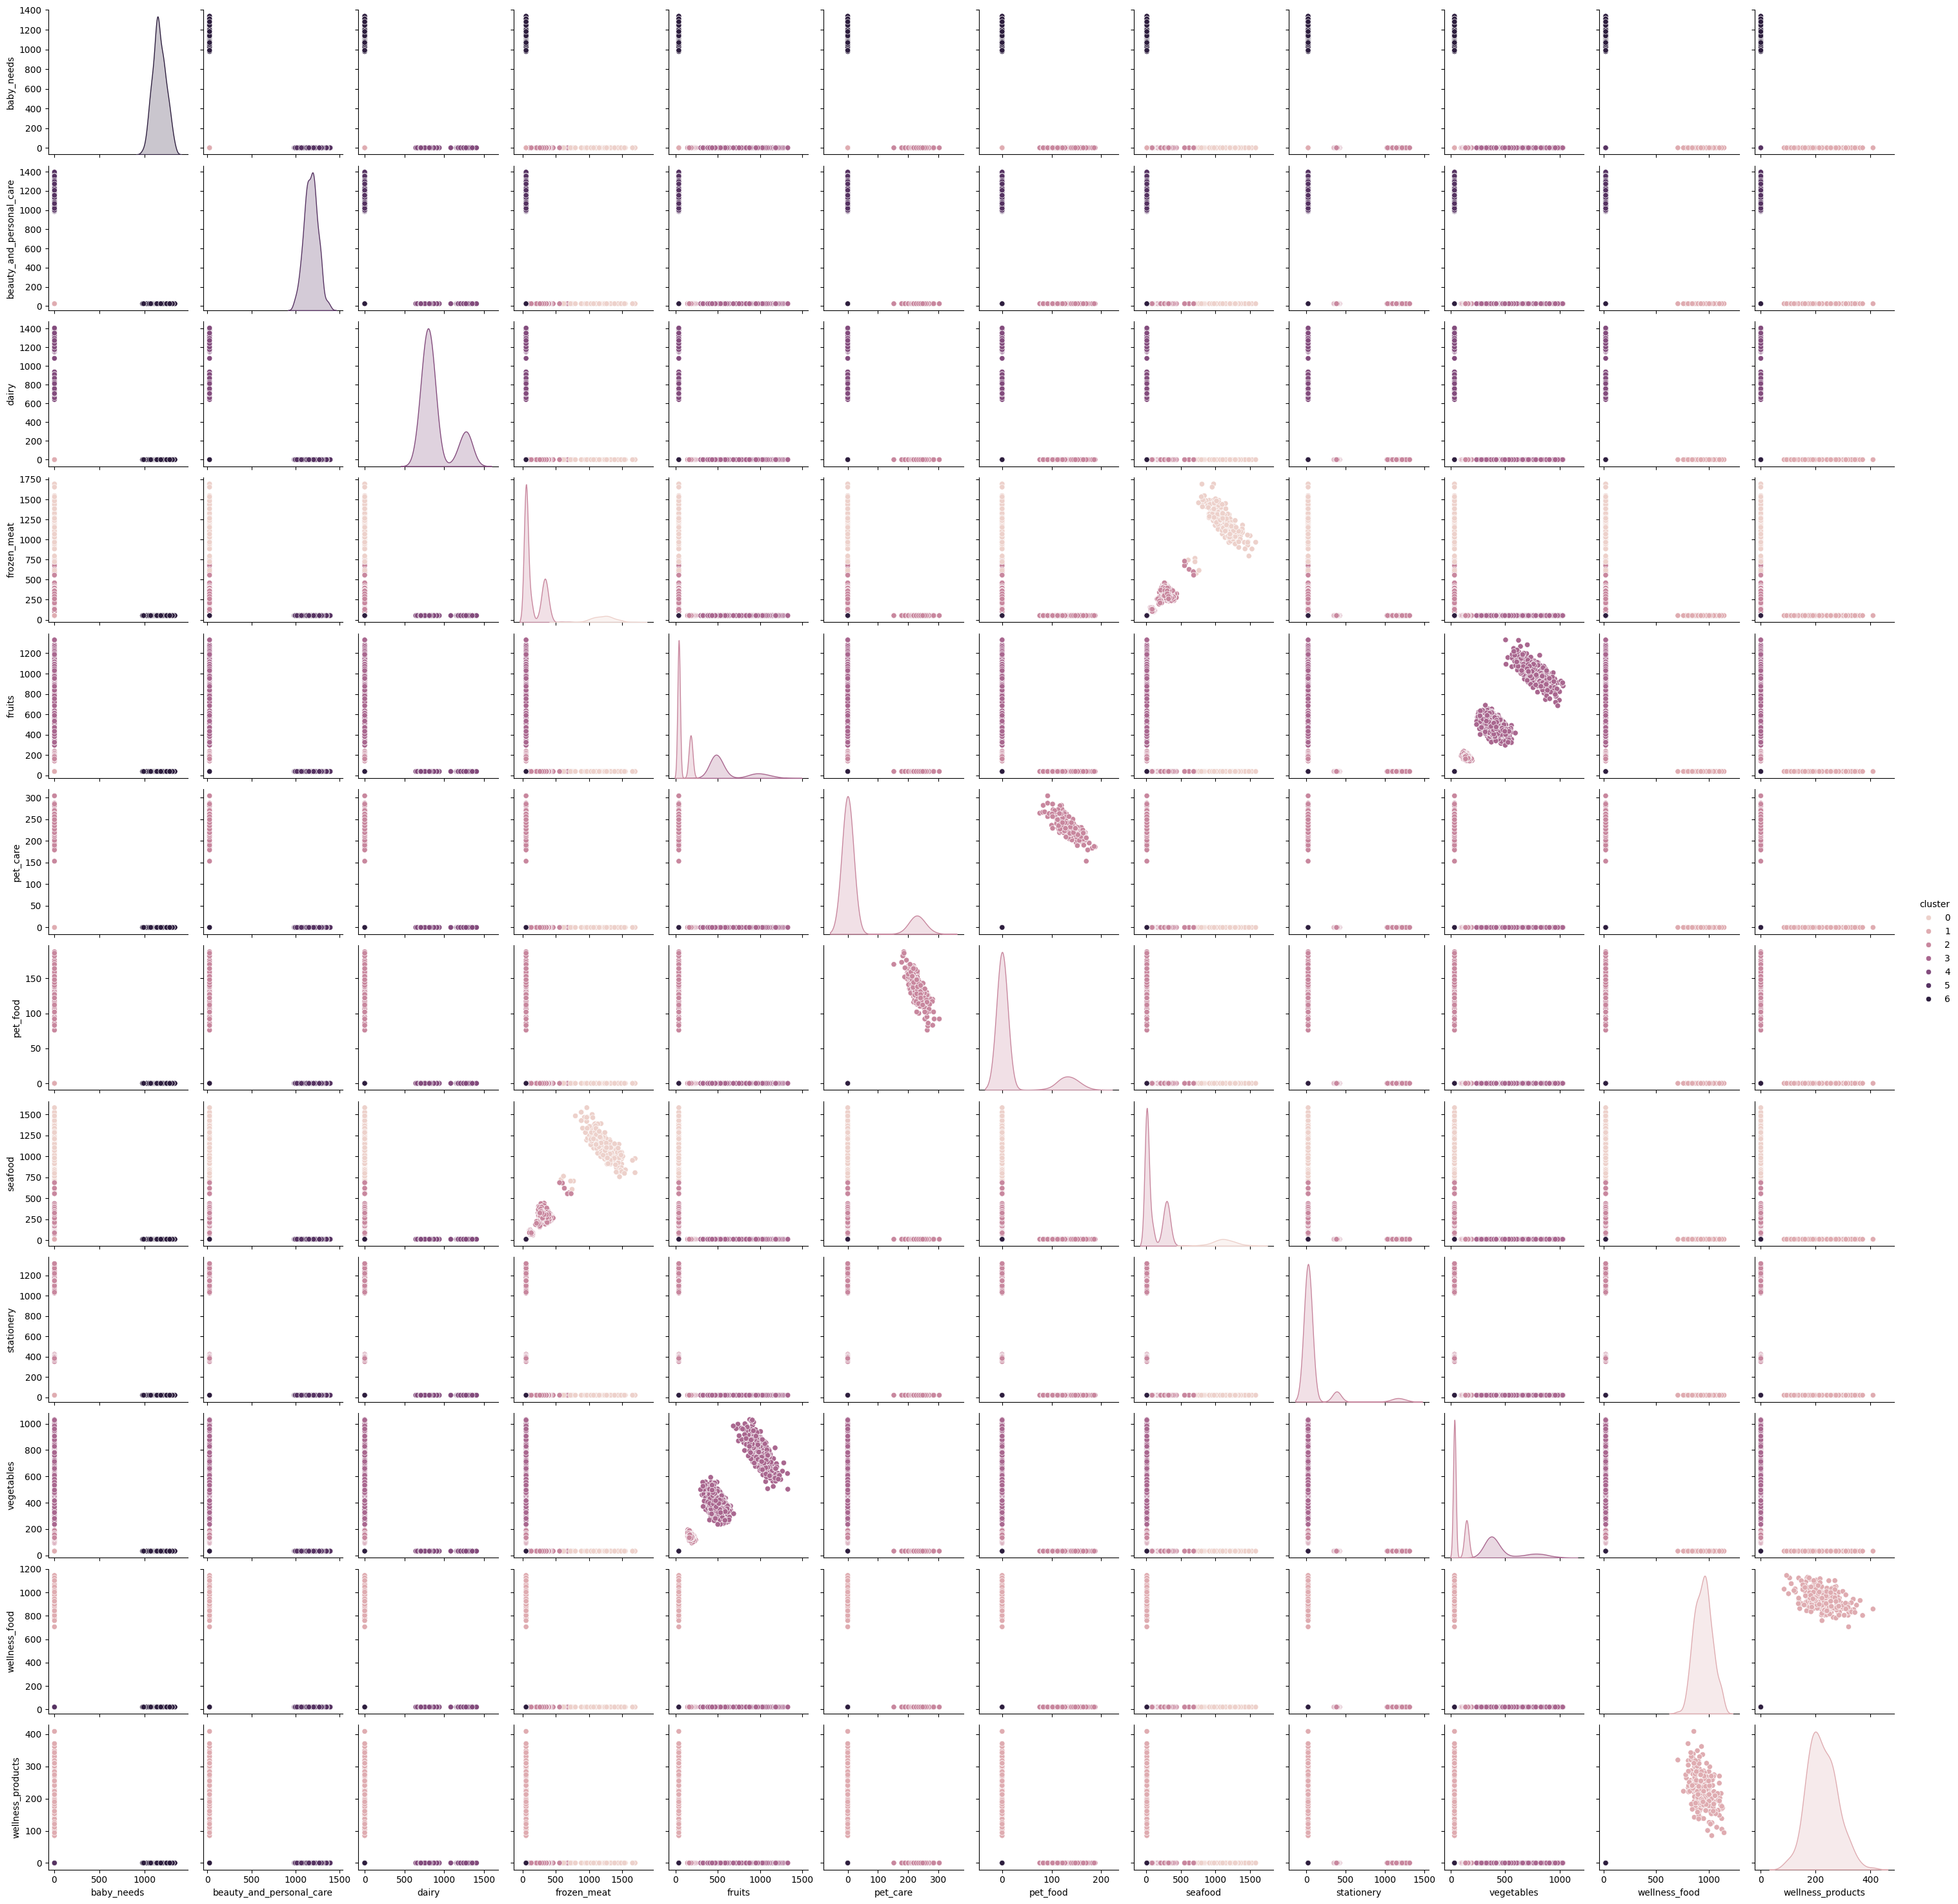

In [ ]:
import seaborn as sns

# Plot the clusters
# We will use pairplot to visualize the clusters in the three-dimensional space
sns.pairplot(customer_data, hue='cluster', diag_kind='kde',
             vars=['baby_needs','beauty_and_personal_care','dairy','frozen_meat','fruits','pet_care','pet_food','seafood','stationery','vegetables','wellness_food','wellness_products'])
plt.show()

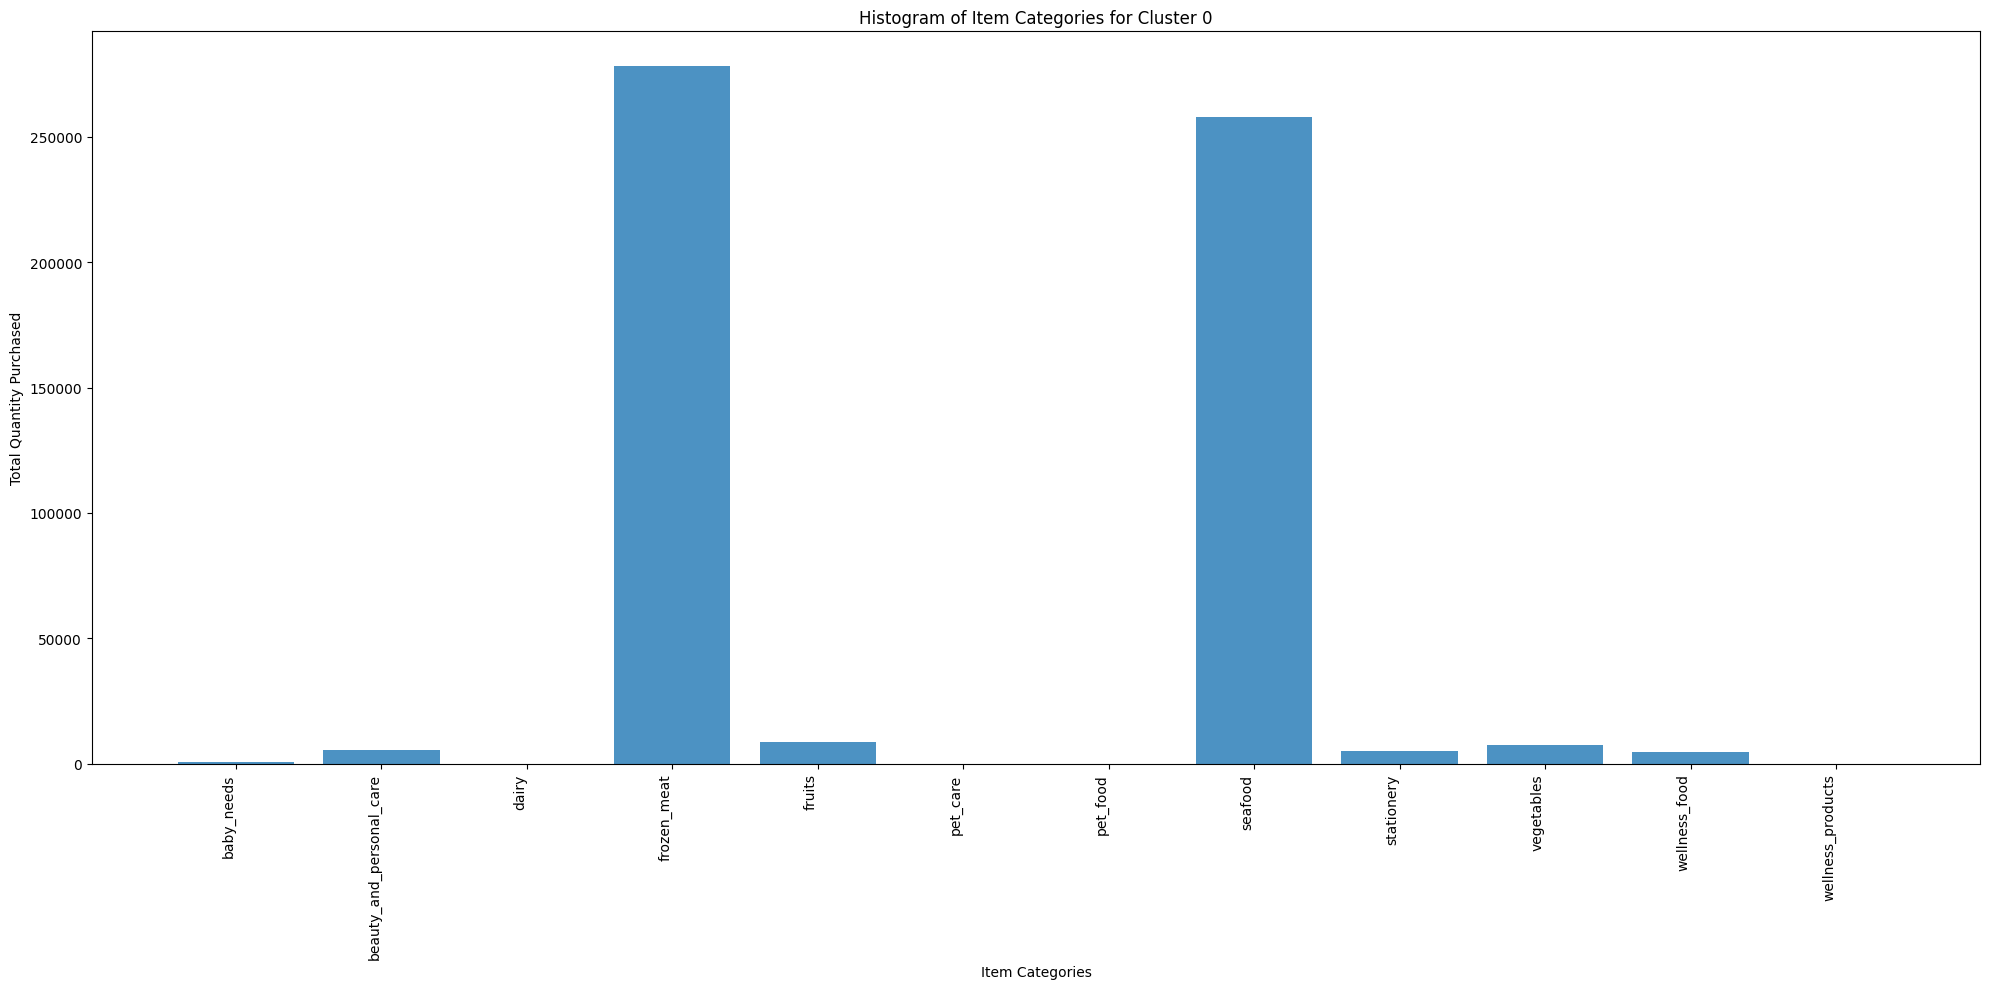

In [ ]:
# Filter data for cluster 0
cluster_0_data = customer_data[customer_data['cluster'] == 0]

# Aggregate quantities across all item categories for cluster 0
cluster_0_agg = cluster_0_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 0
plt.figure(figsize=(20, 10))
plt.bar(cluster_0_agg.index, cluster_0_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 0')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_0_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,230.000000,230.0,230.0,230.0,230.000000,230.0,230.0,230.0,230.000000,230.0,230.0,230.0,230.0,230.000000,230.000000,230.0
mean,2115.208696,3.0,24.0,0.0,1209.430435,38.0,0.0,0.0,1120.600000,22.0,33.0,20.0,0.0,170.243478,1.047885,0.0
std,1238.855568,0.0,0.0,0.0,173.215876,0.0,0.0,0.0,163.678927,0.0,0.0,0.0,0.0,0.804912,0.007367,0.0
min,10.000000,3.0,24.0,0.0,579.000000,38.0,0.0,0.0,607.000000,22.0,33.0,20.0,0.0,168.000000,1.029240,0.0
25%,1026.250000,3.0,24.0,0.0,1099.250000,38.0,0.0,0.0,1016.250000,22.0,33.0,20.0,0.0,170.000000,1.041176,0.0
50%,2130.500000,3.0,24.0,0.0,1222.500000,38.0,0.0,0.0,1115.000000,22.0,33.0,20.0,0.0,170.000000,1.046784,0.0
75%,3217.250000,3.0,24.0,0.0,1316.250000,38.0,0.0,0.0,1224.250000,22.0,33.0,20.0,0.0,171.000000,1.052941,0.0
max,4190.000000,3.0,24.0,0.0,1692.000000,38.0,0.0,0.0,1579.000000,22.0,33.0,20.0,0.0,171.000000,1.065476,0.0


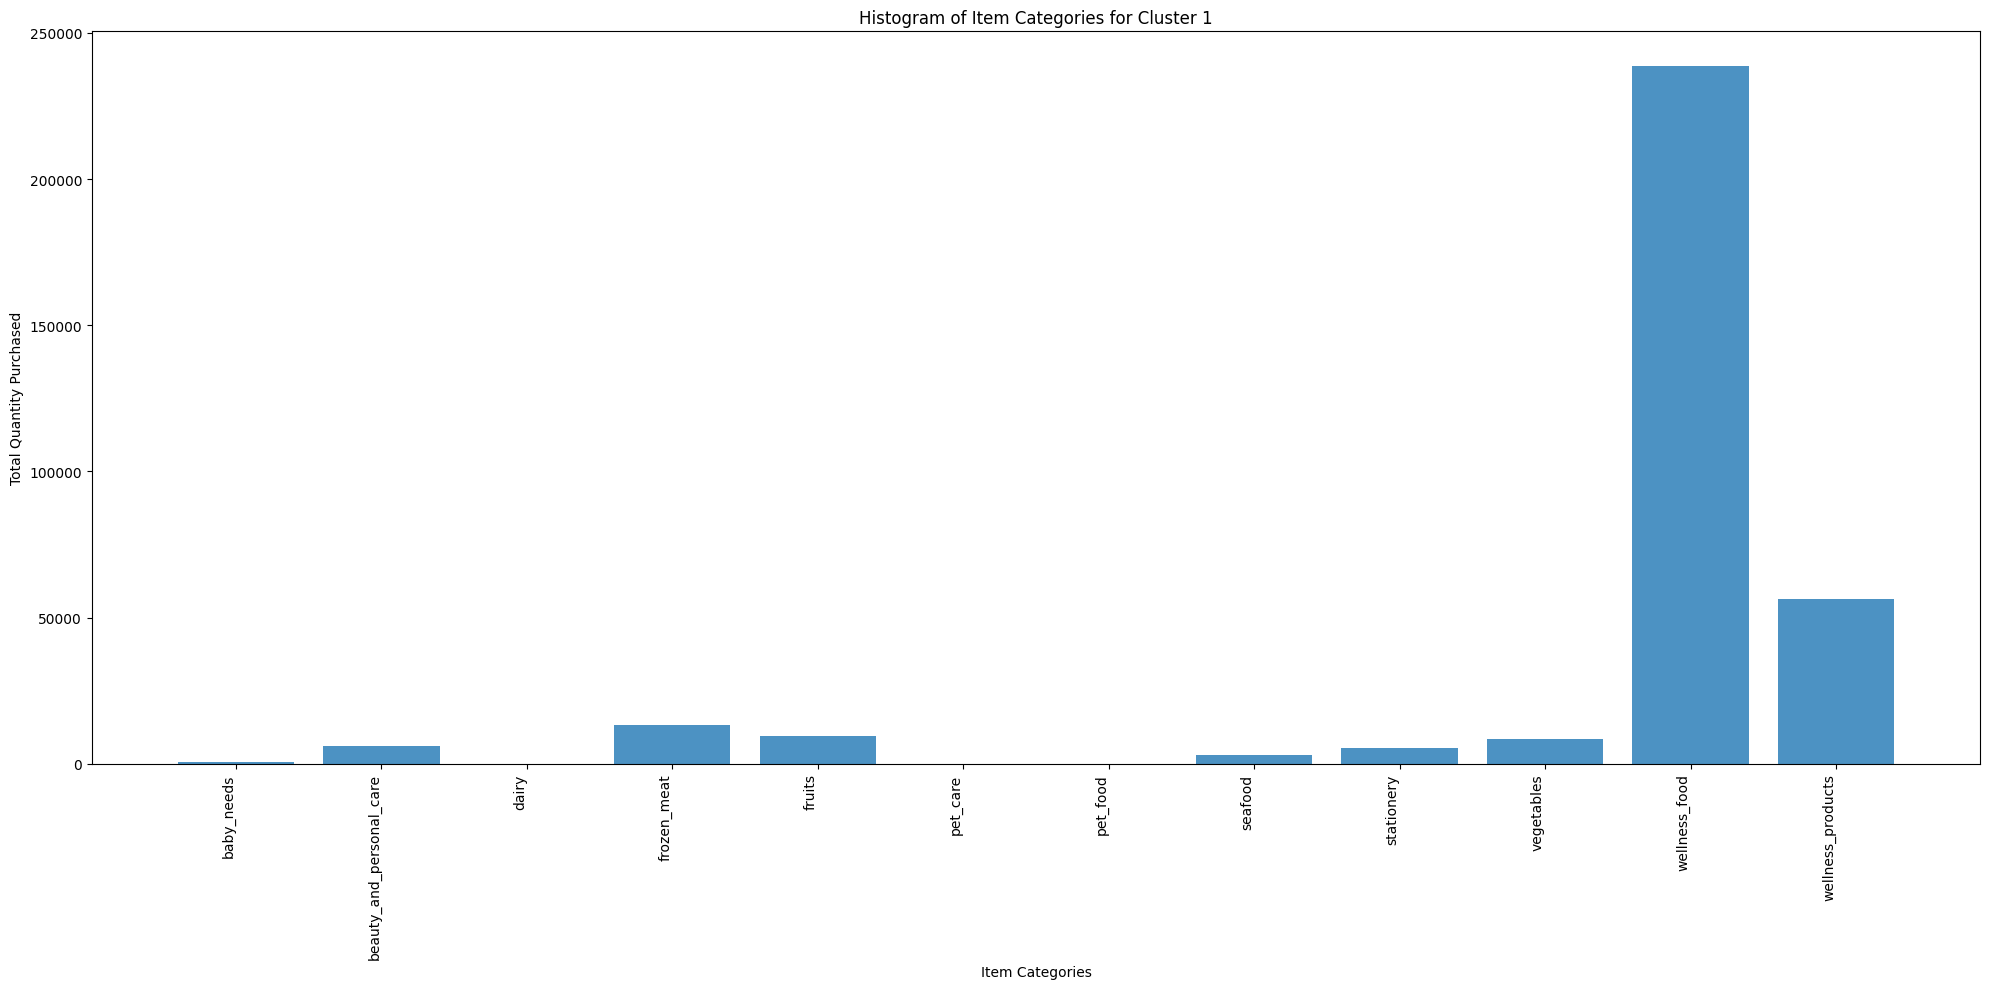

In [ ]:
# Filter data for cluster 1
cluster_1_data = customer_data[customer_data['cluster'] == 1]

# Aggregate quantities across all item categories for cluster 1
cluster_1_agg = cluster_1_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 1
plt.figure(figsize=(20, 10))
plt.bar(cluster_1_agg.index, cluster_1_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 1')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_1_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,252.000000,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.000000,252.000000,252.000000,252.000000,252.0
mean,2038.900794,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,946.924603,223.523810,144.313492,1.235354,1.0
std,1157.813285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.771413,53.997007,0.725830,0.008943,0.0
min,15.000000,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,706.000000,85.000000,142.000000,1.206897,1.0
25%,1138.750000,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,888.500000,186.000000,144.000000,1.227586,1.0
50%,1960.500000,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,949.500000,219.000000,144.000000,1.234483,1.0
75%,2919.250000,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,997.500000,259.000000,145.000000,1.243056,1.0
max,4199.000000,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,1145.000000,409.000000,145.000000,1.253521,1.0


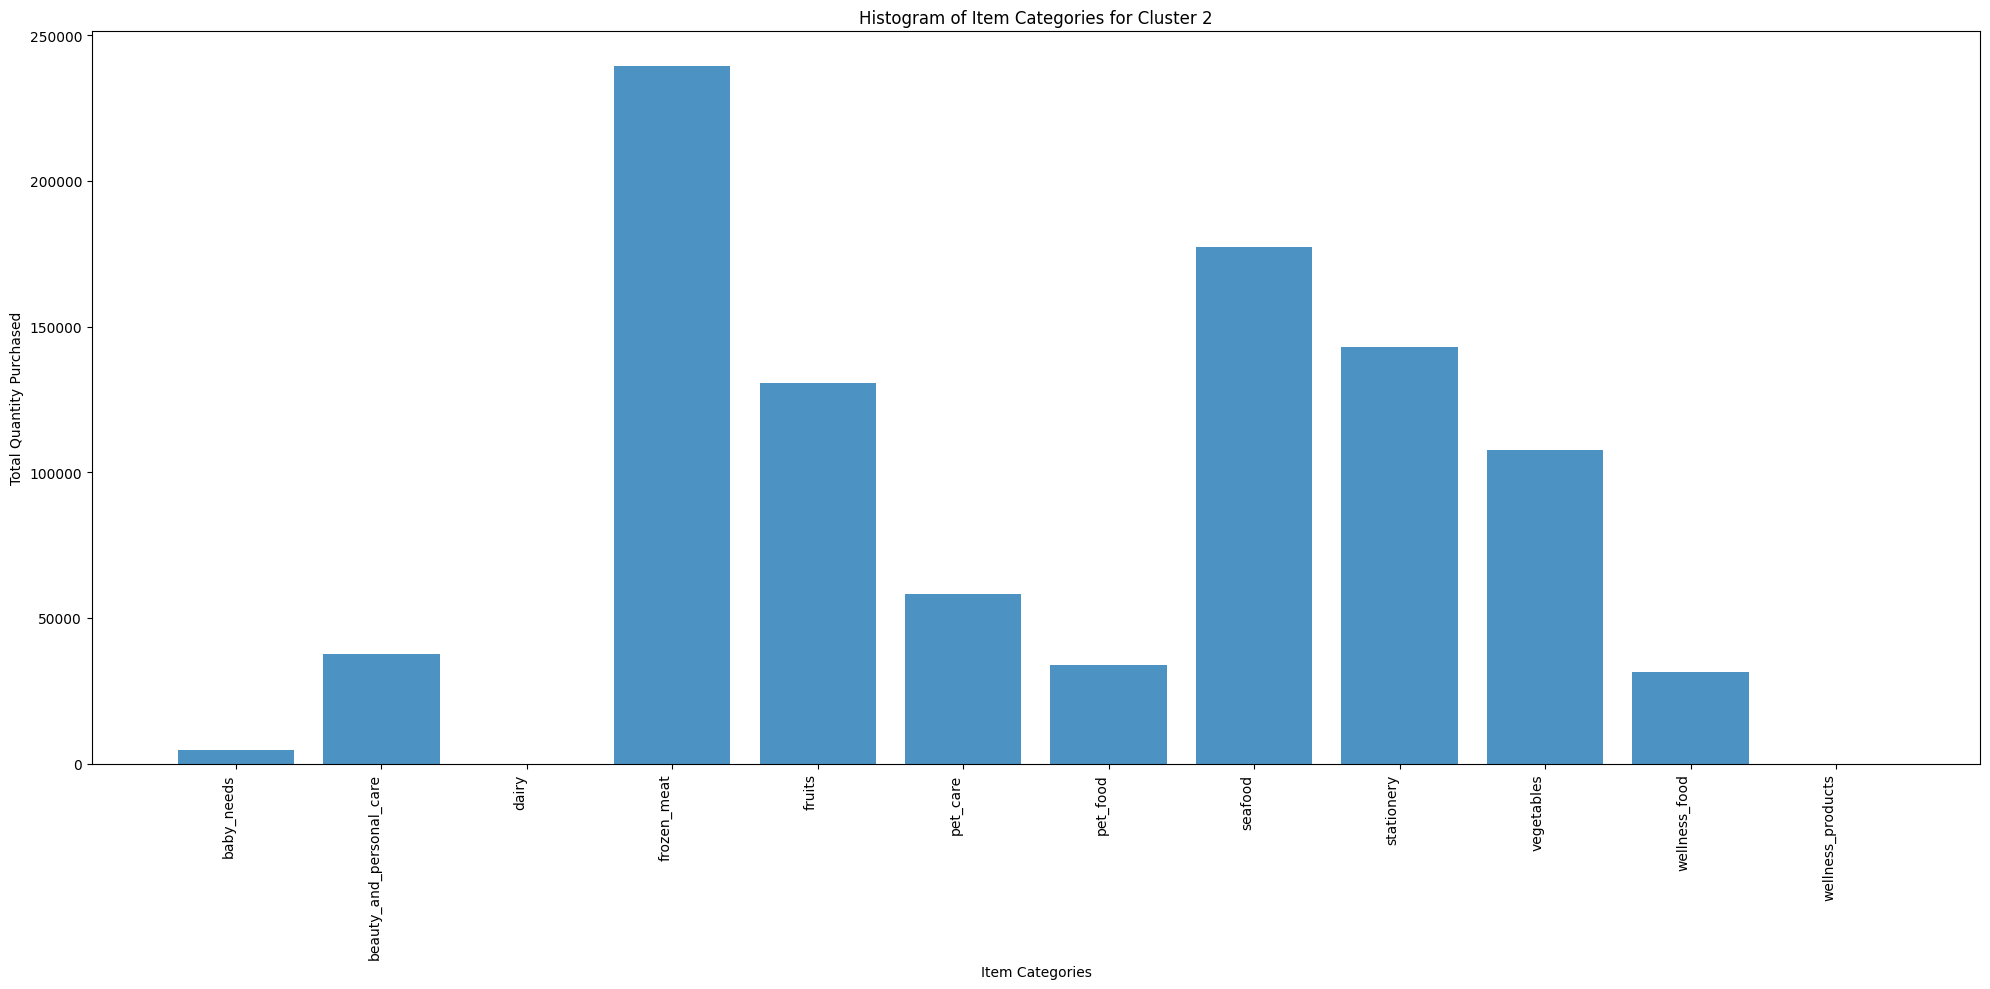

In [ ]:
# Filter data for cluster 2
cluster_2_data = customer_data[customer_data['cluster'] == 2]

# Aggregate quantities across all item categories for cluster 2
cluster_2_agg = cluster_2_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 2
plt.figure(figsize=(20, 10))
plt.bar(cluster_2_agg.index, cluster_2_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 2')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_2_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,1572.000000,1572.0,1572.0,1572.0,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.0,1572.0,1572.000000,1572.000000,1572.0
mean,2092.095420,3.0,24.0,0.0,152.241730,83.049618,37.077608,21.467557,112.849873,91.051527,68.484097,20.0,0.0,142.138041,1.257672,2.0
std,1229.694293,0.0,0.0,0.0,136.016484,66.676319,85.302116,49.751869,136.475053,235.167837,52.831203,0.0,0.0,7.634266,0.078242,0.0
min,6.000000,3.0,24.0,0.0,52.000000,38.000000,0.000000,0.000000,12.000000,22.000000,33.000000,20.0,0.0,116.000000,1.029240,2.0
25%,1017.250000,3.0,24.0,0.0,52.000000,38.000000,0.000000,0.000000,12.000000,22.000000,33.000000,20.0,0.0,144.000000,1.227586,2.0
50%,2102.000000,3.0,24.0,0.0,52.000000,38.000000,0.000000,0.000000,12.000000,22.000000,33.000000,20.0,0.0,144.000000,1.234483,2.0
75%,3171.500000,3.0,24.0,0.0,304.000000,166.000000,0.000000,0.000000,266.250000,22.000000,131.000000,20.0,0.0,145.000000,1.243056,2.0
max,4195.000000,3.0,24.0,0.0,730.000000,238.000000,304.000000,188.000000,688.000000,1317.000000,195.000000,20.0,0.0,171.000000,1.543103,2.0


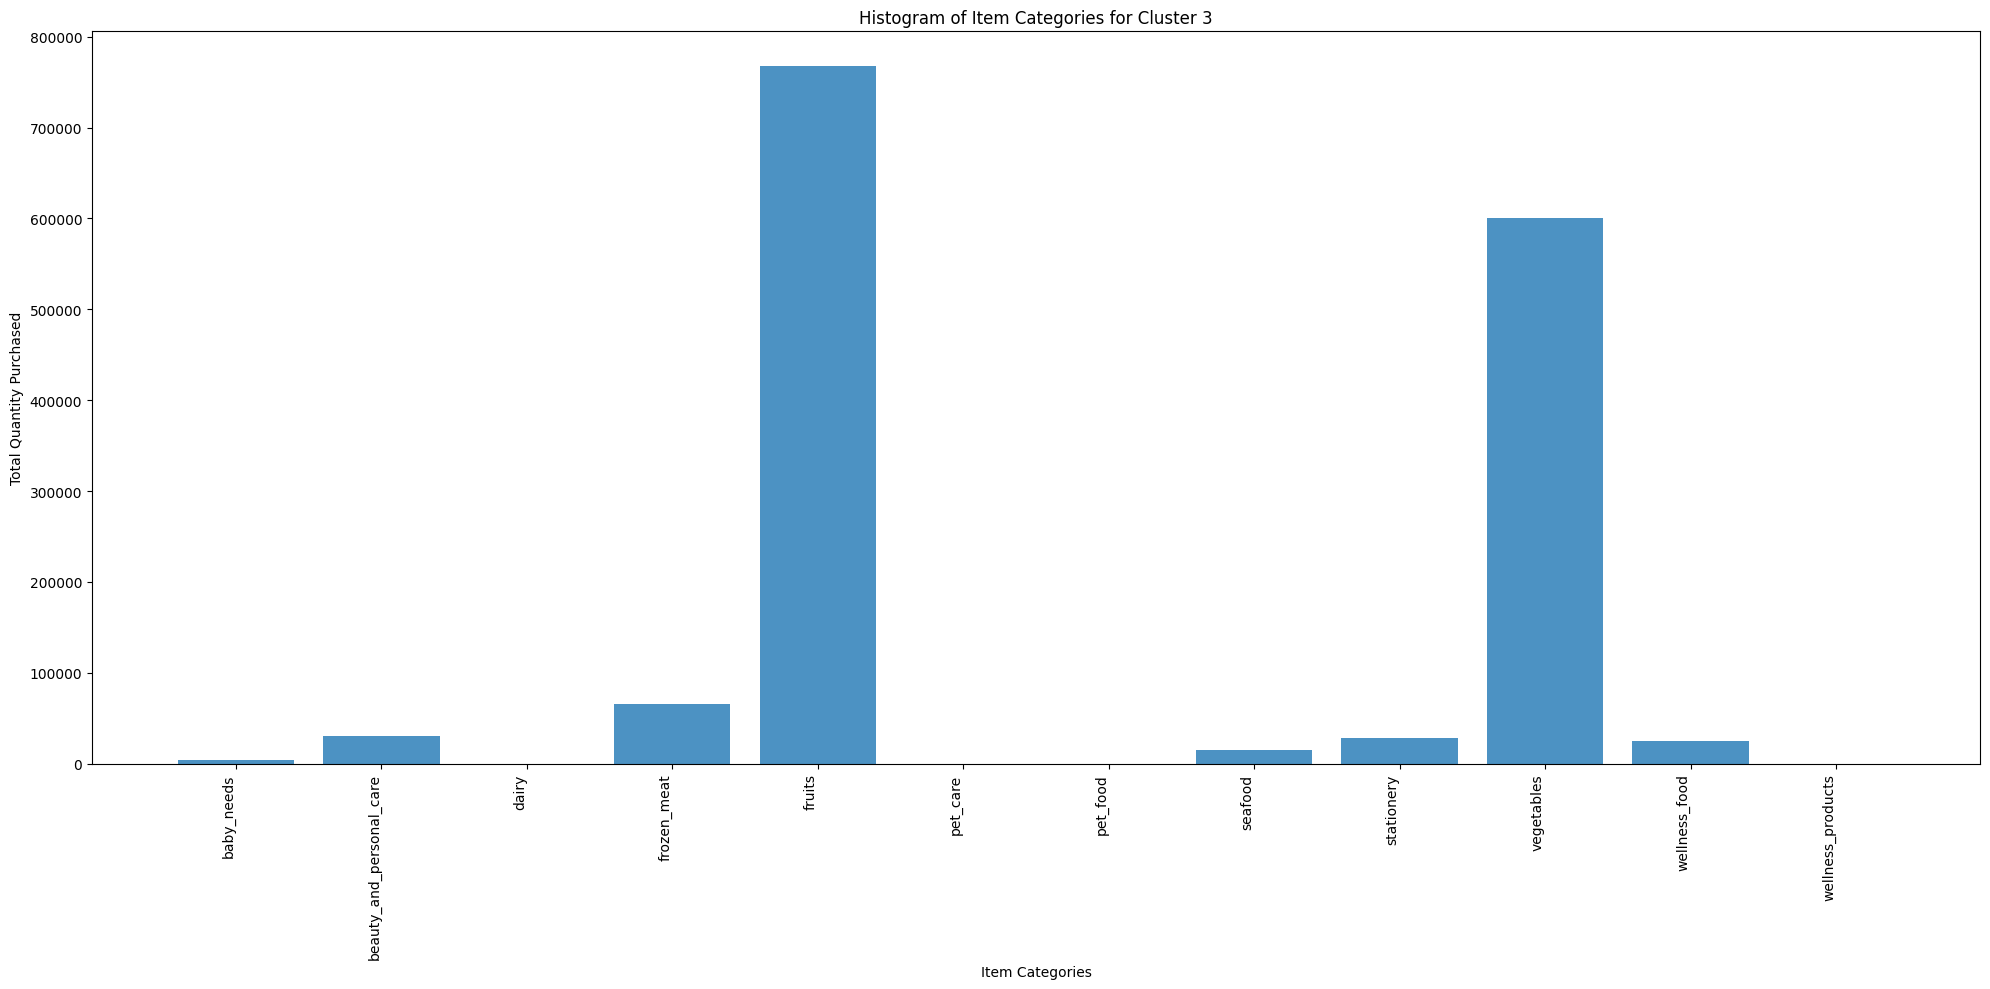

In [ ]:
# Filter data for cluster 3
cluster_3_data = customer_data[customer_data['cluster'] == 3]

# Aggregate quantities across all item categories for cluster 3
cluster_3_agg = cluster_3_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 3
plt.figure(figsize=(20, 10))
plt.bar(cluster_3_agg.index, cluster_3_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 3')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_3_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,1263.000000,1263.0,1263.0,1263.0,1263.0,1263.000000,1263.0,1263.0,1263.0,1263.0,1263.000000,1263.0,1263.0,1263.000000,1263.000000,1263.0
mean,2120.881235,3.0,24.0,0.0,52.0,607.638163,0.0,0.0,12.0,22.0,475.494062,20.0,0.0,150.471101,1.190253,3.0
std,1210.762972,0.0,0.0,0.0,0.0,231.413194,0.0,0.0,0.0,0.0,183.975257,0.0,0.0,11.030957,0.080041,0.0
min,1.000000,3.0,24.0,0.0,52.0,296.000000,0.0,0.0,12.0,22.0,236.000000,20.0,0.0,142.000000,1.023392,3.0
25%,1058.500000,3.0,24.0,0.0,52.0,459.000000,0.0,0.0,12.0,22.0,354.000000,20.0,0.0,144.000000,1.213793,3.0
50%,2086.000000,3.0,24.0,0.0,52.0,507.000000,0.0,0.0,12.0,22.0,400.000000,20.0,0.0,145.000000,1.234483,3.0
75%,3157.000000,3.0,24.0,0.0,52.0,619.500000,0.0,0.0,12.0,22.0,518.500000,20.0,0.0,145.000000,1.236111,3.0
max,4182.000000,3.0,24.0,0.0,52.0,1331.000000,0.0,0.0,12.0,22.0,1032.000000,20.0,0.0,171.000000,1.260563,3.0


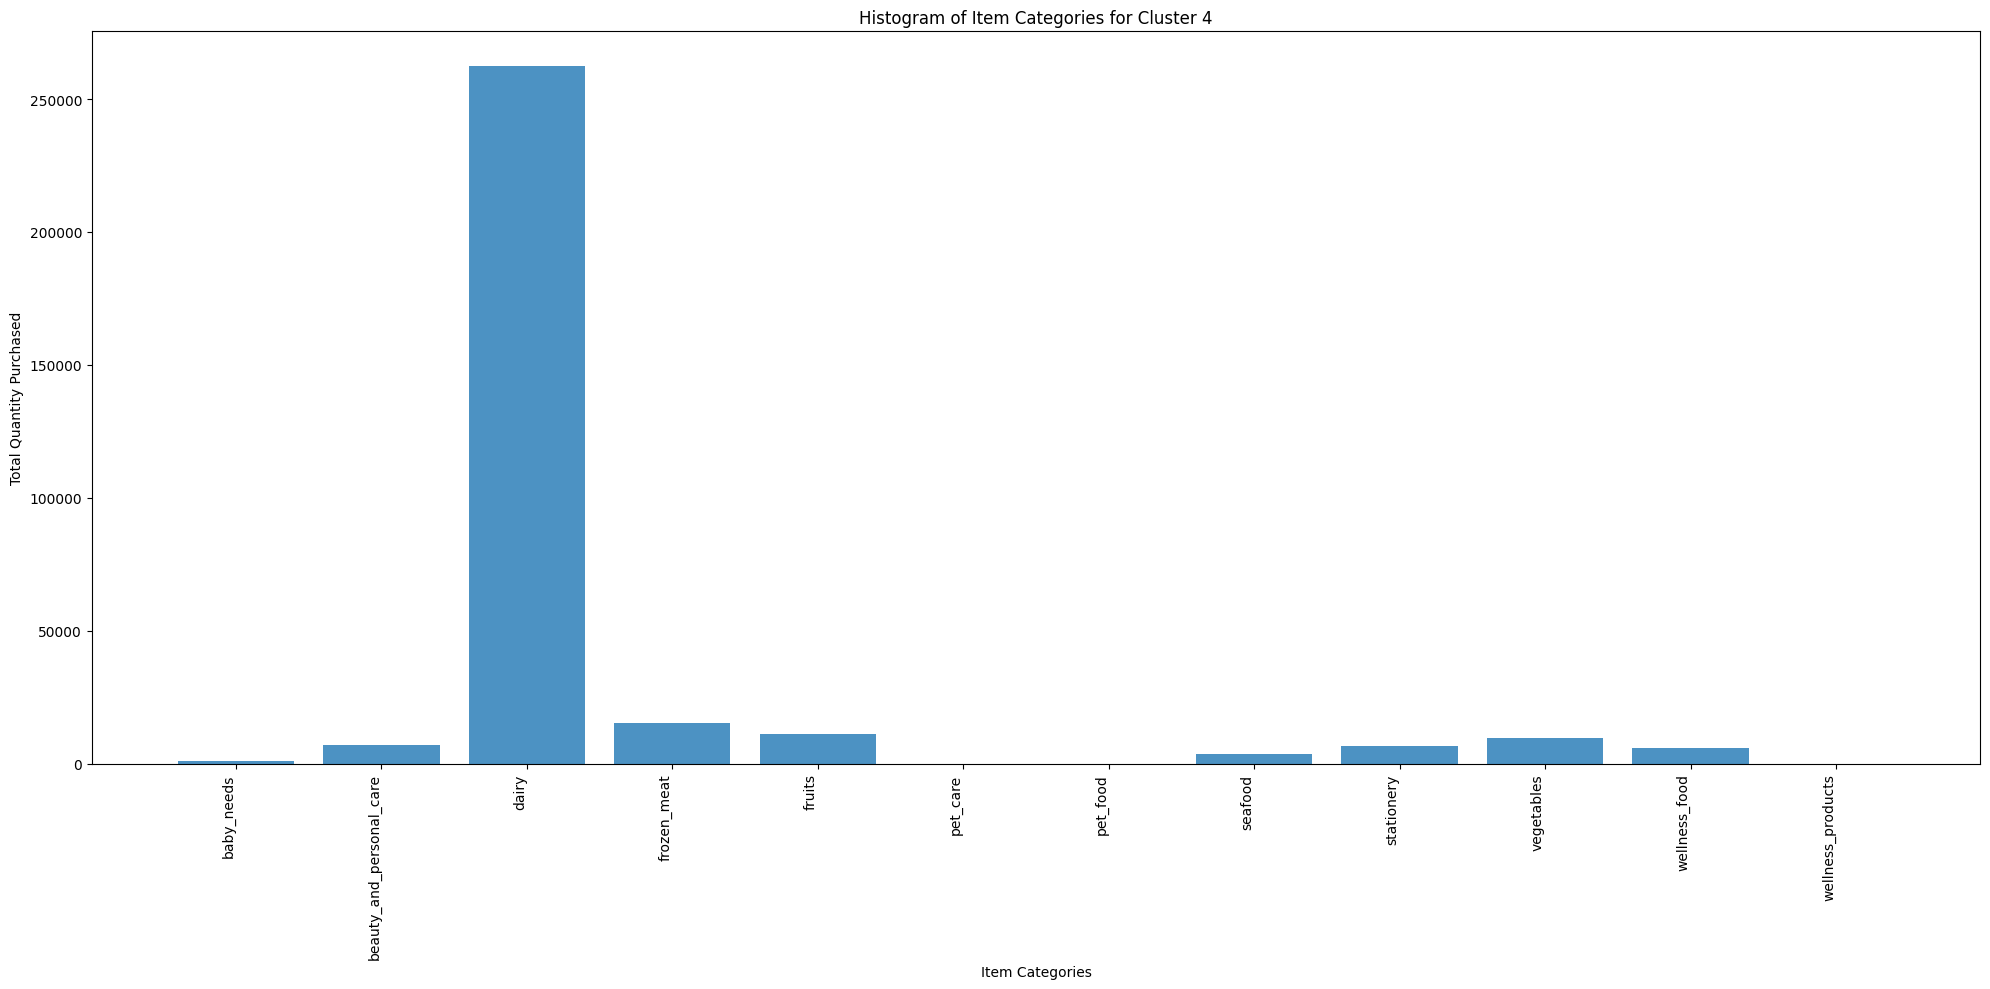

In [ ]:
# Filter data for cluster 4
cluster_4_data = customer_data[customer_data['cluster'] == 4]

# Aggregate quantities across all item categories for cluster 4
cluster_4_agg = cluster_4_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 4
plt.figure(figsize=(20, 10))
plt.bar(cluster_4_agg.index, cluster_4_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 4')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_4_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,295.000000,295.0,295.0,295.000000,295.0,295.0,295.0,295.0,295.0,295.0,295.0,295.0,295.0,295.000000,295.000000,295.0
mean,2051.596610,3.0,24.0,889.284746,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,149.440678,1.196949,4.0
std,1212.816942,0.0,0.0,197.284318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.291783,0.074829,0.0
min,3.000000,3.0,24.0,643.000000,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,142.000000,1.029240,4.0
25%,1011.500000,3.0,24.0,765.000000,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.000000,1.220690,4.0
50%,2056.000000,3.0,24.0,822.000000,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145.000000,1.234483,4.0
75%,3068.500000,3.0,24.0,886.000000,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145.000000,1.236111,4.0
max,4184.000000,3.0,24.0,1407.000000,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,171.000000,1.251748,4.0


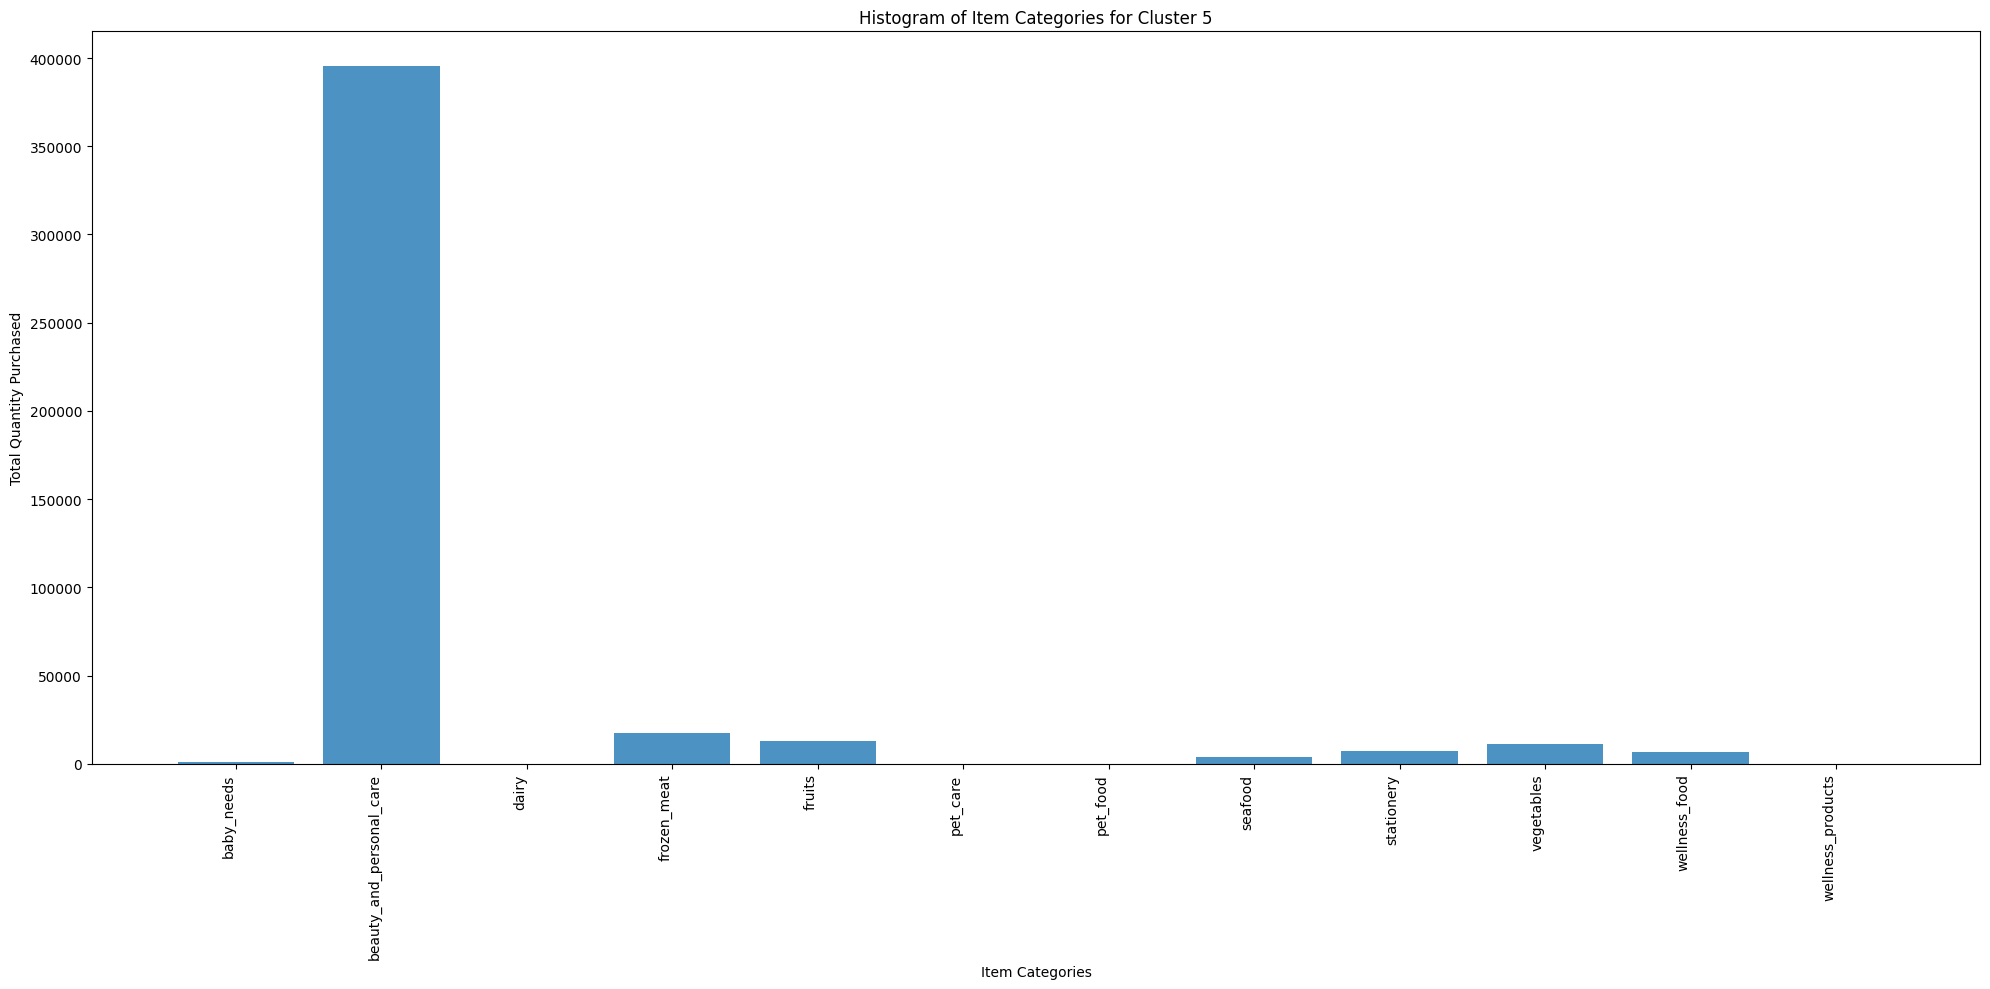

In [ ]:
# Filter data for cluster 5
cluster_5_data = customer_data[customer_data['cluster'] == 5]

# Aggregate quantities across all item categories for cluster 4
cluster_5_agg = cluster_5_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 5
plt.figure(figsize=(20, 10))
plt.bar(cluster_5_agg.index, cluster_5_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 5')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_5_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,336.000000,336.0,336.000000,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.0,336.000000,336.000000,336.0
mean,2104.630952,3.0,1176.693452,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.270833,1.235150,5.0
std,1218.173448,0.0,76.317159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.788640,0.009693,0.0
min,14.000000,3.0,986.000000,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,142.000000,1.206897,5.0
25%,1066.750000,3.0,1122.750000,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.000000,1.227586,5.0
50%,2124.500000,3.0,1179.500000,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.000000,1.234483,5.0
75%,3131.500000,3.0,1227.000000,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145.000000,1.243056,5.0
max,4197.000000,3.0,1396.000000,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145.000000,1.260563,5.0


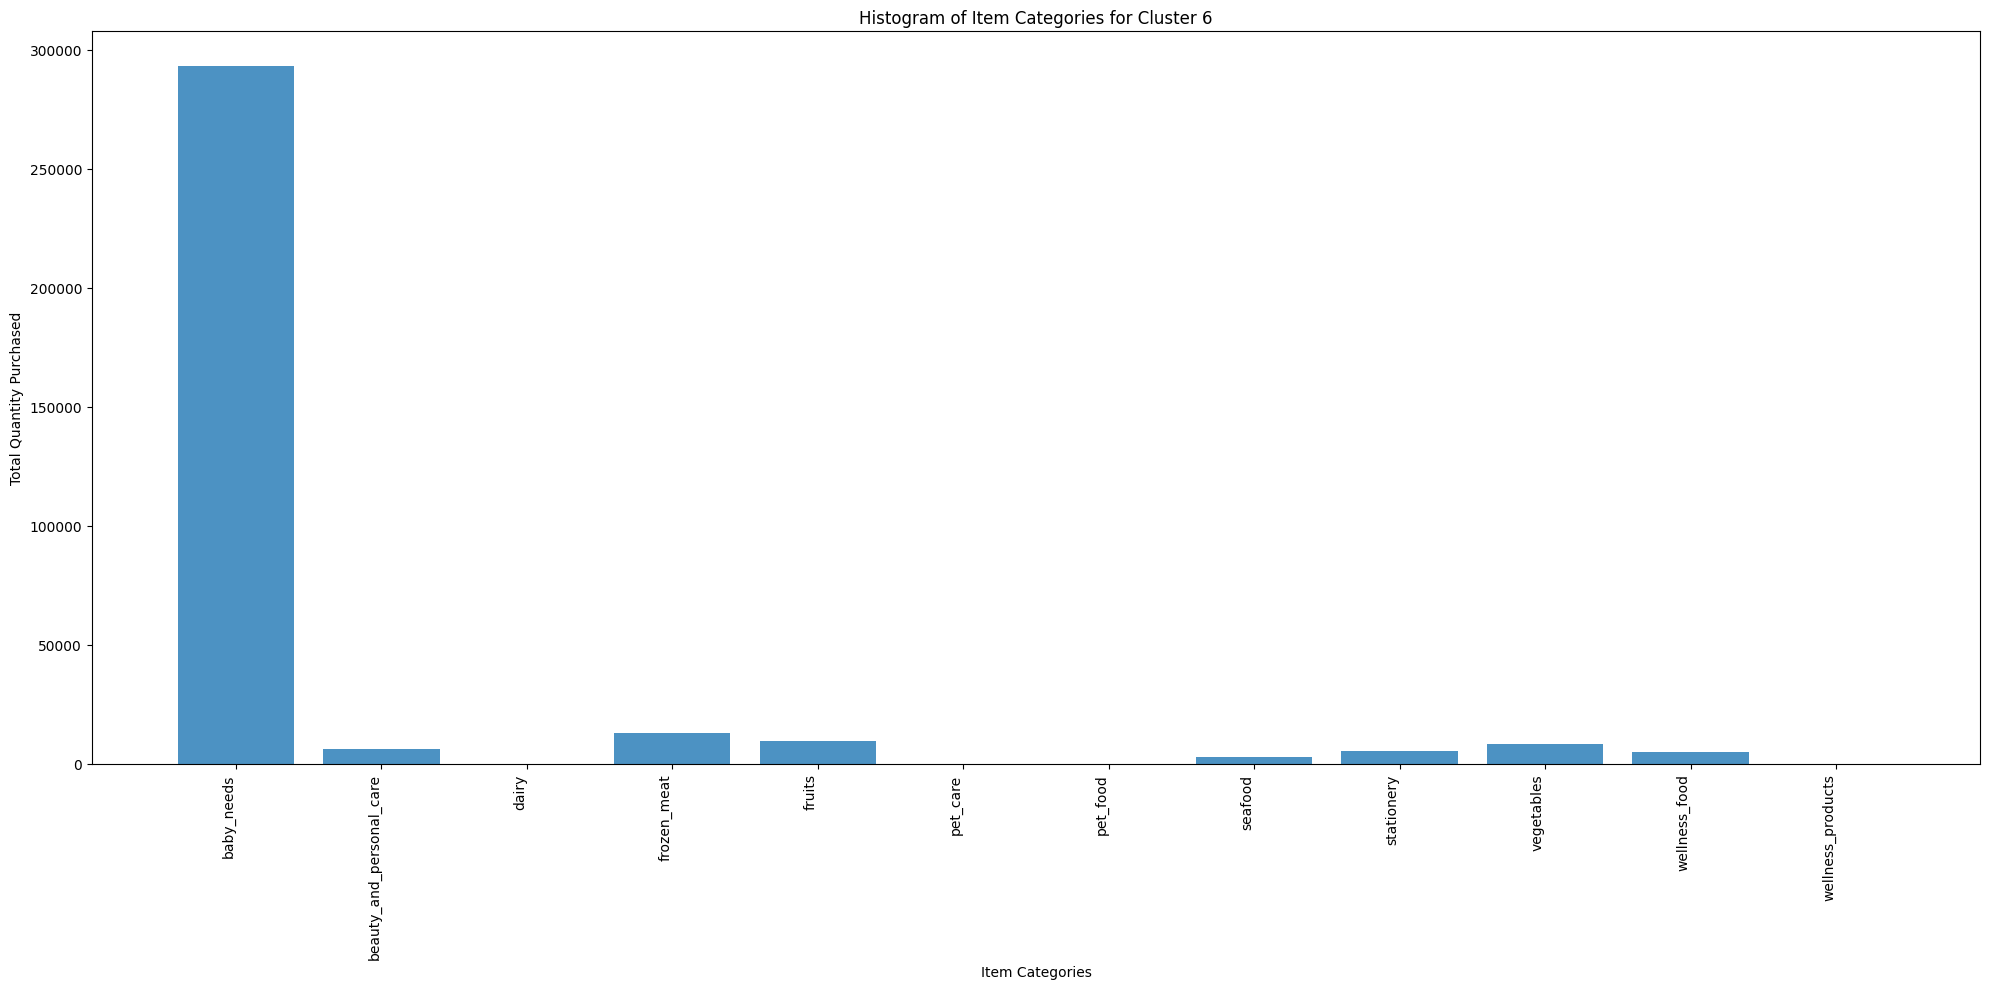

In [ ]:
# Filter data for cluster 6
cluster_6_data = customer_data[customer_data['cluster'] == 6]

# Aggregate quantities across all item categories for cluster 6
cluster_6_agg = cluster_6_data.drop(['customer_code', 'cluster', 'total_transactions', 'purchase_frequency'], axis=1).sum()

# Plotting the histogram for cluster 6
plt.figure(figsize=(20, 10))
plt.bar(cluster_6_agg.index, cluster_6_agg.values, alpha=0.8)
plt.xlabel('Item Categories')
plt.ylabel('Total Quantity Purchased')
plt.title('Histogram of Item Categories for Cluster 6')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
cluster_6_data.describe()

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster
count,252.000000,252.000000,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.000000,252.000000,252.0
mean,2150.694444,1163.166667,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.345238,1.234424,6.0
std,1142.956897,72.012145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.733285,0.009110,0.0
min,17.000000,979.000000,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,142.000000,1.206897,6.0
25%,1162.750000,1115.000000,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.000000,1.227586,6.0
50%,2148.500000,1155.000000,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,144.000000,1.234483,6.0
75%,3155.000000,1211.250000,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145.000000,1.243056,6.0
max,4200.000000,1337.000000,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145.000000,1.260563,6.0


In [ ]:
customer_data['segment'] = customer_data['cluster'].map({
    0: 'Frozen Meat and Seafood Enthusiasts',
    1: 'Wellness Seekers',
    2: 'Diverse Shoppers',
    3: 'Fresh Produce Lovers',
    4: 'Dairy Aficionados',
    5: 'Beauty and Personal Care Enthusiasts',
    6: 'Baby Needs Shoppers'
})

customer_data

,customer_code,baby_needs,beauty_and_personal_care,dairy,frozen_meat,fruits,pet_care,pet_food,seafood,stationery,vegetables,wellness_food,wellness_products,total_transactions,purchase_frequency,cluster,segment
0,1,3.0,24.0,0.0,52.0,496.0,0.0,0.0,12.0,22.0,402.0,20.0,0.0,142,1.239437,3,Fresh Produce Lovers
1,2,3.0,24.0,0.0,52.0,545.0,0.0,0.0,12.0,22.0,449.0,20.0,0.0,144,1.243056,3,Fresh Produce Lovers
2,3,3.0,24.0,791.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.220690,4,Dairy Aficionados
3,4,3.0,24.0,779.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.234483,4,Dairy Aficionados
4,5,3.0,24.0,1274.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,170,1.052941,4,Dairy Aficionados
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,4196,3.0,1154.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,145,1.227586,5,Beauty and Personal Care Enthusiasts
4196,4197,3.0,1068.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,20.0,0.0,143,1.244755,5,Beauty and Personal Care Enthusiasts
4197,4198,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,945.0,190.0,145,1.220690,1,Wellness Seekers
4198,4199,3.0,24.0,0.0,52.0,38.0,0.0,0.0,12.0,22.0,33.0,925.0,255.0,144,1.243056,1,Wellness Seekers


In [ ]:
segmented_data = customer_data[['customer_code', 'segment']]
segmented_data


,customer_code,segment
0,1,Fresh Produce Lovers
1,2,Fresh Produce Lovers
2,3,Dairy Aficionados
3,4,Dairy Aficionados
4,5,Dairy Aficionados
...,...,...
4195,4196,Beauty and Personal Care Enthusiasts
4196,4197,Beauty and Personal Care Enthusiasts
4197,4198,Wellness Seekers
4198,4199,Wellness Seekers


In [ ]:
# Group by item_category and item_code to sum up the sales_quantity
grouped_df = merged_df.groupby(['item_category', 'item_name']).agg({'sales_quantity': 'sum'}).reset_index()

# Sort the results within each item_category to find the top and bottom sold items
grouped_df = grouped_df.sort_values(['item_category', 'sales_quantity'], ascending=[True, False])

# Create a summary list to store the results
summary_data = []

# Loop through each item_category to populate the summary list
for category in grouped_df['item_category'].unique():
    top_items_cat = grouped_df[grouped_df['item_category'] == category].head(3)
    least_items_cat = grouped_df[grouped_df['item_category'] == category].tail(3)  # Select bottom 3 items
    most_sold = top_items_cat.iloc[0]['item_name']
    second_most_sold = top_items_cat.iloc[1]['item_name'] if len(top_items_cat) > 1 else None
    third_most_sold = top_items_cat.iloc[2]['item_name'] if len(top_items_cat) > 2 else None
    least_sold = least_items_cat.iloc[-1]['item_name'] if len(least_items_cat) > 0 else None
    second_least_sold = least_items_cat.iloc[-2]['item_name'] if len(least_items_cat) > 1 else None
    third_least_sold = least_items_cat.iloc[-3]['item_name'] if len(least_items_cat) > 2 else None
    summary_data.append({
        'item_category': category,
        'most_sold': most_sold,
        'second_most_sold': second_most_sold,
        'third_most_sold': third_most_sold,
        'least_sold': least_sold,
        'second_least_sold': second_least_sold,
        'third_least_sold': third_least_sold
    })

# Convert the summary list into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
summary_df

,item_category,most_sold,second_most_sold,third_most_sold,least_sold,second_least_sold,third_least_sold
0,baby_needs,baby_diapers,silicon pacifiers,baby_shampoo,baby_cream,baby_soap,baby_shampoo
1,beauty_and_personal_care,conditioner,shampoo,body_wash,facial_cleanser,lip_balm,soap
2,dairy,butter,vanialla ice cream,set yogurt,cheese slices,drinking yogurt,chocolate ice cream
3,frozen_meat,chicken_breast_slices_500g,pork_bacon_500g,chicken_meatballs_250g,beef_meatballs_200g,chicken_sausages_150g,chicken_meatballs_250g
4,fruits,papaya,fuji apple,pineapple,banana,grapes,green apple
5,pet_care,slicker brush,cat litter,pet shampoo,dog collar,dog leash,pet shampoo
6,pet_food,cat food,chicken and liver treats,dog treats,dog treats,chicken and liver treats,cat food
7,seafood,prawns,sea crabs,seer_fish,tuna,cuttlefish,seer_fish
8,stationery,highlighter_6_pack,glue_stick,pencils_hb_6_pc,whiteboard_marker_blue,single_rule_cr_book_120p,drawing_book_small_20pg
9,vegetables,beetroot,capsicum,green_beans,carrot,pumpkin,cucumber


In [ ]:
category_mapping = {
    'Frozen Meat and Seafood Enthusiasts': ('frozen_meat', 'seafood'),
    'Wellness Seekers': ('wellness_food', 'wellness_products'),
    'Diverse Shoppers': ('frozen_meat', 'seafood', 'stationery', 'fruits', 'vegetables', 'pet_care'),
    'Fresh Produce Lovers': ('fruits', 'vegetables'),
    'Dairy Aficionados': ('dairy'),
    'Beauty and Personal Care Enthusiasts': ('beauty_and_personal_care'),
    'Baby Needs Shoppers': ('baby_needs')
}

# Print the dictionary for verification
print(category_mapping)

{'Frozen Meat and Seafood Enthusiasts': ('frozen_meat', 'seafood'), 'Wellness Seekers': ('wellness_food', 'wellness_products'), 'Diverse Shoppers': ('frozen_meat', 'seafood', 'stationery', 'fruits', 'vegetables', 'pet_care'), 'Fresh Produce Lovers': ('fruits', 'vegetables'), 'Dairy Aficionados': 'dairy', 'Beauty and Personal Care Enthusiasts': 'beauty_and_personal_care', 'Baby Needs Shoppers': 'baby_needs'}


In [ ]:
# Group by customer_code and item_name to sum up the sales_quantity
customer_item_summary = merged_df.groupby(['customer_code', 'item_name']).agg({'sales_quantity': 'sum'}).reset_index()

# Sort the results within each customer_code to find the top bought items
customer_item_summary = customer_item_summary.sort_values(['customer_code', 'sales_quantity'], ascending=[True, False])

# Create a summary DataFrame to store the top 4 items for each customer
top_items_summary = customer_item_summary.groupby('customer_code').head(4)

top_items_summary

,customer_code,item_name,sales_quantity
21,1,papaya,108
13,1,grapes,104
2,1,beetroot,93
11,1,fuji apple,87
45,2,fuji apple,126
...,...,...,...
131859,4199,multivitamin_bottle,226
131899,4200,silicon pacifiers,318
131874,4200,baby_diapers,292
131876,4200,baby_soap,250


In [ ]:
# Initialize a list to store the summary data
summary_data = []

# Loop through each customer to populate the summary list
for customer in top_items_summary['customer_code'].unique():
    top_items = top_items_summary[top_items_summary['customer_code'] == customer]
    most_bought = top_items.iloc[0]['item_name'] if len(top_items) > 0 else None
    second_most_bought = top_items.iloc[1]['item_name'] if len(top_items) > 1 else None
    third_most_bought = top_items.iloc[2]['item_name'] if len(top_items) > 2 else None
    fourth_most_bought = top_items.iloc[3]['item_name'] if len(top_items) > 3 else None
    summary_data.append({
        'customer_code': customer,
        'most_bought': most_bought,
        'second_most_bought': second_most_bought,
        'third_most_bought': third_most_bought,
        'fourth_most_bought': fourth_most_bought
    })

# Convert the summary list into a DataFrame
customer_top_items_df = pd.DataFrame(summary_data)

# Display the summary DataFrame
customer_top_items_df

,customer_code,most_bought,second_most_bought,third_most_bought,fourth_most_bought
0,1,papaya,grapes,beetroot,fuji apple
1,2,fuji apple,beetroot,pumpkin,green_beans
2,3,cheese wedges,set yogurt,butter,drinking yogurt
3,4,butter,set yogurt,cheese wedges,cheese slices
4,5,milk carton,set yogurt,vanialla ice cream,butter
...,...,...,...,...,...
4195,4196,sunscreen,lip_balm,perfume,facial_cleanser
4196,4197,facial_cleanser,perfume,body_wash,conditioner
4197,4198,multivitamin_bottle,green_tea_bags_25_pack,smoothie_mix_6_packs,yoga_mat
4198,4199,protein_bars,green_tea_bags_25_pack,yoga_mat,multivitamin_bottle


In [ ]:
segmented_data

,customer_code,segment
0,1,Fresh Produce Lovers
1,2,Fresh Produce Lovers
2,3,Dairy Aficionados
3,4,Dairy Aficionados
4,5,Dairy Aficionados
...,...,...
4195,4196,Beauty and Personal Care Enthusiasts
4196,4197,Beauty and Personal Care Enthusiasts
4197,4198,Wellness Seekers
4198,4199,Wellness Seekers


In [ ]:
# Merge the customer segment data with the top items data
final_df = segmented_data.merge(customer_top_items_df, on='customer_code', how='left')

# Display the final DataFrame
final_df

,customer_code,segment,most_bought,second_most_bought,third_most_bought,fourth_most_bought
0,1,Fresh Produce Lovers,papaya,grapes,beetroot,fuji apple
1,2,Fresh Produce Lovers,fuji apple,beetroot,pumpkin,green_beans
2,3,Dairy Aficionados,cheese wedges,set yogurt,butter,drinking yogurt
3,4,Dairy Aficionados,butter,set yogurt,cheese wedges,cheese slices
4,5,Dairy Aficionados,milk carton,set yogurt,vanialla ice cream,butter
...,...,...,...,...,...,...
4195,4196,Beauty and Personal Care Enthusiasts,sunscreen,lip_balm,perfume,facial_cleanser
4196,4197,Beauty and Personal Care Enthusiasts,facial_cleanser,perfume,body_wash,conditioner
4197,4198,Wellness Seekers,multivitamin_bottle,green_tea_bags_25_pack,smoothie_mix_6_packs,yoga_mat
4198,4199,Wellness Seekers,protein_bars,green_tea_bags_25_pack,yoga_mat,multivitamin_bottle


In [ ]:
# prompt: output final_df as csv file

final_df.to_csv('final_output.csv', index=False)


In [ ]:
merged_df

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,transaction_month
1,792,2023-04-19 17:04:00,item_cd_12,11,fresh,fruits,green apple,2023-04
2,792,2023-05-29 08:26:00,item_cd_12,27,fresh,fruits,green apple,2023-05
3,792,2023-06-12 11:57:00,item_cd_12,25,fresh,fruits,green apple,2023-06
4,4024,2023-02-22 08:55:00,item_cd_12,13,fresh,fruits,green apple,2023-02
5,176,2023-03-17 15:51:00,item_cd_12,14,fresh,fruits,green apple,2023-03
...,...,...,...,...,...,...,...,...
654876,3057,2023-03-29 10:58:00,item_cd_46,6,Hygiene,baby_needs,baby_soap,2023-03
654877,3057,2023-04-22 08:56:00,item_cd_46,6,Hygiene,baby_needs,baby_soap,2023-04
654878,3057,2023-04-29 10:48:00,item_cd_46,5,Hygiene,baby_needs,baby_soap,2023-04
654879,3057,2023-06-24 16:07:00,item_cd_46,12,Hygiene,baby_needs,baby_soap,2023-06


In [ ]:
merged_df['day_of_week'] = merged_df['transaction_time'].dt.day_name()
merged_df

<ipython-input-83-1be1f9757566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['day_of_week'] = merged_df['transaction_time'].dt.day_name()


,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,transaction_month,day_of_week
1,792,2023-04-19 17:04:00,item_cd_12,11,fresh,fruits,green apple,2023-04,Wednesday
2,792,2023-05-29 08:26:00,item_cd_12,27,fresh,fruits,green apple,2023-05,Monday
3,792,2023-06-12 11:57:00,item_cd_12,25,fresh,fruits,green apple,2023-06,Monday
4,4024,2023-02-22 08:55:00,item_cd_12,13,fresh,fruits,green apple,2023-02,Wednesday
5,176,2023-03-17 15:51:00,item_cd_12,14,fresh,fruits,green apple,2023-03,Friday
...,...,...,...,...,...,...,...,...,...
654876,3057,2023-03-29 10:58:00,item_cd_46,6,Hygiene,baby_needs,baby_soap,2023-03,Wednesday
654877,3057,2023-04-22 08:56:00,item_cd_46,6,Hygiene,baby_needs,baby_soap,2023-04,Saturday
654878,3057,2023-04-29 10:48:00,item_cd_46,5,Hygiene,baby_needs,baby_soap,2023-04,Saturday
654879,3057,2023-06-24 16:07:00,item_cd_46,12,Hygiene,baby_needs,baby_soap,2023-06,Saturday


In [ ]:
merged_df[merged_df['day_of_week']=='Sunday']

,customer_code,transaction_time,item code,sales_quantity,department,item_category,item_name,transaction_month,day_of_week
